# Reference:

- Satish Dhawle: https://youtube.com/playlist?list=PLUtiFxlb49snsLqN0HqZo8Z45f-7jiM1J&si=fiWbo7NRoCxv1S21
- TechTFQ: https://youtube.com/playlist?list=PLavw5C92dz9Ef4E-1Zi9KfCTXS_IN8gXZ&si=Dw6YzRuXRWCEFrzT

- Reading: https://www.tutorialspoint.com/sql/index.htm

# Topic to cover:

https://www.instagram.com/p/DHXYKAQSAFK/?img_index=4&igsh=MXgwNGNkeHZqNGw0bg==

# Subquery

A subquery is a query inside another SQL query. It is enclosed in parentheses and is used to return data that the main query can use.

**Types of Subqueries:**
    
1. Single-row subquery (returns one value)
2. Multi-row subquery (returns multiple values)
3. Correlated subquery (depends on the outer query)
4. Nested subquery (subquery inside another subquery)

### Single-row subqueries

- A single-row subquery returns only one value (one row, one column).
- Used with comparison operators (`=, >, <, >=, <=, <>`).
- Can be used in `SELECT`, `WHERE`, `UPDATE`, and `DELETE` statements.
- If the subquery returns multiple rows, it will cause an error.
- Use `CASE` statements to apply conditional logic based on subqueries.

In [ ]:
# Find the employee with the highest salary

SELECT *
FROM employee
WHERE salary = (SELECT MAX(salary) FROM employee);


# How it works:

# The subquery (SELECT MAX(salary) FROM employee) returns the highest salary.
# The outer query finds the employee with that salary.

In [ ]:
# Find employees earning more than the company’s average salary

SELECT emp_name, salary
FROM employee
WHERE salary > (SELECT AVG(salary) FROM employee);

In [ ]:
# You can also use a single-row subquery inside the SELECT clause to add a computed column.

# 🎯 Find all employees and display the highest salary alongside their details

SELECT emp_name, salary, (SELECT MAX(salary) FROM employee) AS highest_salary
FROM employee;

In [ ]:
# You can use a subquery inside an UPDATE statement to modify specific rows.

# 🎯 Increase the salary of the lowest-paid employee by 10%

UPDATE employee
SET salary = salary * 1.1
WHERE salary = (SELECT MIN(salary) FROM employee);

In [ ]:
# You can use a subquery inside DELETE to remove specific rows.

# 🎯 Delete the employee with the lowest salary

DELETE FROM employee
WHERE salary = (SELECT MIN(salary) FROM employee);


In [ ]:
# Error Scenario: Subquery Returning Multiple Rows
# If a single-row subquery returns more than one row, an error occurs.

SELECT *
FROM employee
WHERE salary = (SELECT salary FROM employee WHERE dept_name = 'IT');

# Why This Fails?

# If multiple employees in IT have different salaries, the subquery will return multiple rows.
# A single-row subquery must return exactly one row.

# Fix: Use IN Instead

SELECT *
FROM employee
WHERE salary IN (SELECT salary FROM employee WHERE dept_name = 'IT');

In [ ]:
# You can combine subqueries with CASE for conditional logic.

# 🎯 Classify Employees Based on Salary Comparison

SELECT emp_name, salary,
    CASE 
        WHEN salary = (SELECT MAX(salary) FROM employee) THEN 'Top Earner'
        WHEN salary = (SELECT MIN(salary) FROM employee) THEN 'Lowest Earner'
        ELSE 'Average Earner'
    END AS salary_category
FROM employee;

### Multi-Row Subqueries

- A multi-row subquery returns multiple rows (one column).
- Used with `IN`, `ANY`, `ALL` operators.
- `IN` → Matches any value in the list.
- `ANY` → Compares with at least one value.
- `ALL` → Compares with all values.
- Use `EXISTS` for better performance when checking for existence.
- Avoid `=` with multi-row subqueries (causes errors).

In [ ]:
# IN is used when you want to match any value in a list returned by the subquery.

# 🎯 Find employees who work in the same department as ‘Alice’

SELECT emp_name, dept_name
FROM employee
WHERE dept_name IN (
    SELECT dept_name 
    FROM employee 
    WHERE emp_name = 'Alice'
);

In [ ]:
# ANY compares each value from the outer query with any value returned by the subquery.

# 🎯 Find employees who earn more than at least one employee in the ‘HR’ department

SELECT emp_name, salary
FROM employee
WHERE salary > ANY (
    SELECT salary 
    FROM employee 
    WHERE dept_name = 'HR'
);

# If HR department salaries are: 5000, 6000, 7000. The query selects employees with salaries above 5000, 6000, or 7000. 
# this query equivalent to: WHERE salary > 5000 OR salary > 6000 OR salary > 7000


In [ ]:
# ALL compares a value to all values returned by the subquery.

# 🎯 Find employees who earn more than all employees in the ‘HR’ department

SELECT emp_name, salary
FROM employee
WHERE salary > ALL (
    SELECT salary 
    FROM employee 
    WHERE dept_name = 'HR'
);

# If HR department salaries are: 5000, 6000, 7000. The outer query selects employees earning above 7000.

In [ ]:
# Error Scenario: Using = with a Multi-Row Subquery

SELECT emp_name
FROM employee
WHERE salary = (SELECT salary FROM employee WHERE dept_name = 'HR');

# Why This Fails?

# If multiple employees in HR have different salaries, the subquery returns multiple rows.
# The = operator expects only one value but gets multiple.
# ✔ Fix: Use IN Instead

SELECT emp_name
FROM employee
WHERE salary IN (SELECT salary FROM employee WHERE dept_name = 'HR');


In [ ]:
# You can use multi-row subqueries inside UPDATE to modify specific records.

# 🎯 Increase the salary of employees who have the lowest salary in their department

UPDATE employee
SET salary = salary * 1.1
WHERE salary IN (
    SELECT MIN(salary) 
    FROM employee 
    GROUP BY dept_name
);


In [ ]:
# You can use multi-row subqueries inside DELETE to remove specific rows.

# 🎯 Delete employees who earn less than the average salary of their department

DELETE FROM employee
WHERE salary < ANY (
    SELECT AVG(salary) 
    FROM employee 
    GROUP BY dept_name
);


In [ ]:
# The EXISTS clause checks if the subquery returns any rows.

# 🎯 Find employees who work in a department that has at least one manager

SELECT emp_name, dept_name
FROM employee e
WHERE EXISTS (
    SELECT 1 
    FROM department d 
    WHERE e.dept_name = d.dept_name 
    AND d.manager_id IS NOT NULL
);


In [ ]:
# You can use a multi-row subquery inside CASE for conditional logic.

# 🎯 Classify Employees Based on Salary Rank

SELECT emp_name, salary,
    CASE 
        WHEN salary >= ALL (SELECT salary FROM employee WHERE dept_name = 'IT') 
        THEN 'Highest Paid in IT'
        WHEN salary <= ANY (SELECT salary FROM employee WHERE dept_name = 'HR') 
        THEN 'Lowest Paid in HR'
        ELSE 'Average Employee'
    END AS salary_category
FROM employee;


### Correlated Subqueries

A correlated subquery is a subquery that depends on the outer query for its execution. Unlike a normal subquery that executes independently, a correlated subquery runs once for each row processed by the outer query.

- A correlated subquery runs once for each row of the outer query.
- It refers to columns from the outer query, making it dependent on it.
- Used in `WHERE`, `EXISTS`, `UPDATE`, and `DELETE` statements.
- Slower than non-correlated subqueries (avoid if possible!).
- Better alternatives: Use `EXISTS`, `JOINs`, or `Window Functions`.



In [ ]:
# Find employees earning more than the average salary of their department

SELECT emp_name, salary, dept_name
FROM employee e1
WHERE salary > (
    SELECT AVG(salary) 
    FROM employee e2 
    WHERE e1.dept_name = e2.dept_name
);

**How Correlated Subqueries Work Internally**

Step-by-Step Execution:
    
1. The outer query picks a row from employee (say, John in IT).
2. The subquery calculates the average salary of the IT department.
3. If John’s salary > IT department average, he is included in the result.
4. The process repeats for every employee.

In [ ]:
# The EXISTS clause checks if the subquery returns at least one row for each row of the outer query.

# 🎯 Find departments that have at least one employee earning more than 10,000

SELECT dept_name
FROM department d
WHERE EXISTS (
    SELECT 1 
    FROM employee e 
    WHERE e.dept_name = d.dept_name 
    AND e.salary > 10000
);

Using `EXISTS` is more efficient than `IN`, as it stops searching once it finds the first matching row.

**Performance Boost:** Unlike IN, EXISTS does not return duplicate values, making it faster in large datasets.



In [ ]:
# You can use a correlated subquery inside UPDATE to modify values based on related rows.

# 🎯 Increase salary by 10% for employees earning below their department’s average salary

UPDATE employee e1
SET salary = salary * 1.1
WHERE salary < (
    SELECT AVG(salary) 
    FROM employee e2 
    WHERE e1.dept_name = e2.dept_name
);


In [ ]:
# Correlated subqueries are useful in DELETE statements when removing specific records based on related data.

# 🎯 Delete employees who have the lowest salary in their department

DELETE FROM employee e1
WHERE salary = (
    SELECT MIN(salary) 
    FROM employee e2 
    WHERE e1.dept_name = e2.dept_name
);
# If multiple employees have the same lowest salary, all of them will be deleted.

In [ ]:
# You can use a correlated subquery to rank employees within their departments.

# 🎯 Find the second-highest salary in each department

SELECT emp_name, salary, dept_name
FROM employee e1
WHERE 2 = (
    SELECT COUNT(DISTINCT salary) 
    FROM employee e2 
    WHERE e1.dept_name = e2.dept_name 
    AND e2.salary >= e1.salary
);

# Alternative Approach Using ROW_NUMBER()

SELECT emp_name, salary, dept_name
FROM (
    SELECT emp_name, salary, dept_name,
           ROW_NUMBER() OVER (PARTITION BY dept_name ORDER BY salary DESC) AS rank
    FROM employee
) t
WHERE rank = 2;

**Better Performance:** Using `ROW_NUMBER()` avoids repeated calculations inside a correlated subquery, making it more efficient.

<br>

Performance Considerations of Correlated Subqueries

**Why Are Correlated Subqueries Slow?**

- A correlated subquery runs once per row of the outer query.
- If the outer query has 100,000 rows, the subquery runs 100,000 times.
- This makes correlated subqueries slower than joins or window functions.

**How to Optimize?** 

- Use `EXISTS` instead of `IN` (for checking existence).
- Use `JOINs` instead of correlated subqueries (when possible).
- Use Window Functions (`ROW_NUMBER()`, `RANK()`) for ranking tasks.
- Use Indexing on columns used in the subquery conditions.

In [ ]:
SELECT e1.emp_name, e1.salary, e1.dept_name
FROM employee e1
JOIN (
    SELECT dept_name, AVG(salary) AS avg_salary
    FROM employee
    GROUP BY dept_name
) e2 ON e1.dept_name = e2.dept_name
WHERE e1.salary > e2.avg_salary;


**Faster Execution:**

- No row-by-row processing
- The subquery executes only once instead of multiple times.

### Nested Subqueries

A nested subquery is a subquery that is placed inside another subquery or SQL statement. These subqueries can be deeply nested, meaning one subquery can be inside another, which in turn is inside another, and so on.

- Nested subqueries can be used in `SELECT`, `FROM`, and `WHERE` clauses.
- Can return single, multiple rows, or multiple columns.
- The outer query depends on the result of the subquery.
- Performance issues arise with large datasets.
- Use `JOINs`, `EXISTS`, or `WITH (CTE)` for better efficiency.
- Used when step-by-step calculations are required.

<br>

Types of Nested Subqueries

#### (A) Single-Row Nested Subquery
- Returns only one value (one row and one column).
- Used with comparison operators (=, >, <, >=, <=, <>).

In [ ]:
# Find employees earning more than the average salary.

SELECT emp_name, salary
FROM employee
WHERE salary > (
    SELECT AVG(salary) 
    FROM employee
);

#### (B) Multi-Row Nested Subquery
- Returns multiple rows (one column, multiple rows).
- Used with IN, ANY, ALL operators.

In [ ]:
# Find employees working in departments with a budget greater than 50,000.

SELECT emp_name, dept_name
FROM employee
WHERE dept_name IN (
    SELECT dept_name 
    FROM department
    WHERE budget > 50000
);

# Alternative Using EXISTS (More Efficient)

SELECT emp_name, dept_name
FROM employee e
WHERE EXISTS (
    SELECT 1 
    FROM department d 
    WHERE e.dept_name = d.dept_name 
    AND d.budget > 50000
);


**Why Use EXISTS?:** `IN` returns all matching values, while `EXISTS` stops at the first match, making it faster.

#### (C) Multi-Column Nested Subquery
- Returns multiple columns.
- Used when multiple values need to match simultaneously.

In [ ]:
# Find employees with the same dept_name and salary as someone from the 'IT' department.

SELECT emp_name, dept_name, salary
FROM employee
WHERE (dept_name, salary) IN (
    SELECT dept_name, salary
    FROM employee
    WHERE dept_name = 'IT'
);

# Alternative Using JOIN (Faster Execution)

SELECT e1.emp_name, e1.dept_name, e1.salary
FROM employee e1
JOIN employee e2 
ON e1.dept_name = e2.dept_name 
AND e1.salary = e2.salary
WHERE e2.dept_name = 'IT';


**Why is JOIN Better?**

- More optimized, especially for large datasets.
- Avoids row-by-row execution, making it faster.

<br>

#### (D) Nested Subquery in FROM Clause (Derived Tables)
- Subqueries in the FROM clause create temporary tables.
- Used when complex calculations need to be performed before selection.

In [ ]:
# Find employees whose salary is above their department’s average.

SELECT e.emp_name, e.salary, e.dept_name
FROM employee e
JOIN (
    SELECT dept_name, AVG(salary) AS avg_salary
    FROM employee
    GROUP BY dept_name
) dept_avg
ON e.dept_name = dept_avg.dept_name
WHERE e.salary > dept_avg.avg_salary;


**Why Use JOIN Instead of a Correlated Subquery?:** The subquery runs only once, making it more efficient than a correlated subquery.

<br>

#### (E) Nested Subquery in SELECT Clause (Scalar Subquery)
- Returns a single value for each row.
- Used when a computed column is needed.

In [ ]:
# Display each employee’s name, salary, and their department's average salary.

SELECT emp_name, salary, 
    (SELECT AVG(salary) 
     FROM employee e2 
     WHERE e1.dept_name = e2.dept_name) AS dept_avg_salary
FROM employee e1;

### Advanced Nested Subquery Concepts

#### (A) Using ANY and ALL with Nested Subqueries
- `ANY`: Returns TRUE if at least one subquery value matches.
- `ALL`: Returns TRUE if all subquery values match.

In [ ]:
# Find employees earning more than at least one employee in the 'Sales' department.

SELECT emp_name, salary
FROM employee
WHERE salary > ANY (
    SELECT salary
    FROM employee
    WHERE dept_name = 'Sales'
);

**Difference Between ANY and ALL:**

- `ANY` means greater than the smallest salary in Sales.
- `ALL` means greater than the highest salary in Sales.

In [ ]:
# Find employees earning more than all employees in 'Marketing'.

SELECT emp_name, salary
FROM employee
WHERE salary > ALL (
    SELECT salary
    FROM employee
    WHERE dept_name = 'Marketing'
);

#### (B) Using Nested Subqueries in `UPDATE`

In [ ]:
# Increase the salary of employees earning below the company’s average salary by 10%.

UPDATE employee
SET salary = salary * 1.1
WHERE salary < (
    SELECT AVG(salary)
    FROM employee
);


#### (C) Using Nested Subqueries in `DELETE`

In [ ]:
# Delete employees earning the lowest salary in their department.

DELETE FROM employee
WHERE (dept_name, salary) IN (
    SELECT dept_name, MIN(salary)
    FROM employee
    GROUP BY dept_name
);

### Performance Considerations for Nested Subqueries

🚨 Nested Subqueries Can Be Slow:

- They execute once per row, leading to poor performance for large datasets.
- Alternatives: Use `JOINs`, `EXISTS`, or `WITH (CTE)` for better optimization.

In [ ]:
# Rewriting Using CTE (Common Table Expression)

WITH DeptAverage AS (
    SELECT dept_name, AVG(salary) AS avg_salary
    FROM employee
    GROUP BY dept_name
)
SELECT e.emp_name, e.salary, e.dept_name
FROM employee e
JOIN DeptAverage d ON e.dept_name = d.dept_name
WHERE e.salary > d.avg_salary;

# JOIN

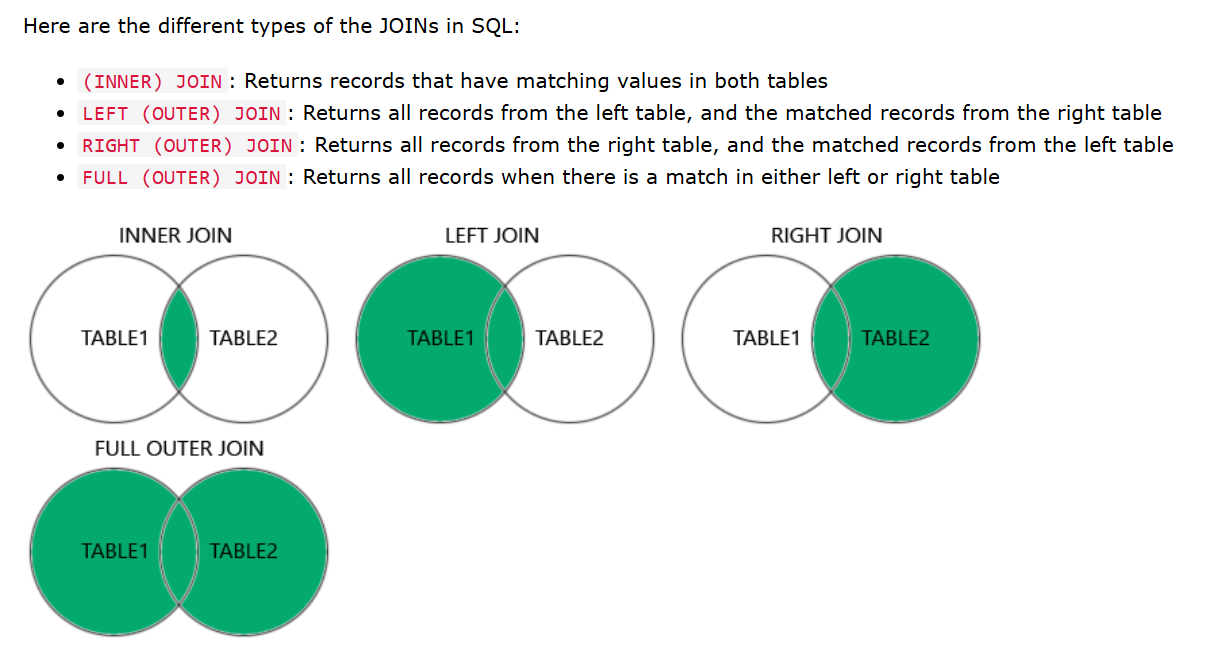

## Inner join

`SELECT ProductID, ProductName, CategoryName FROM Products INNER JOIN Categories ON Products.CategoryID = Categories.CategoryID;`

OR 

`SELECT ProductID, ProductName, CategoryName FROM Products JOIN Categories ON Products.CategoryID = Categories.CategoryID;`

**simply using JOIN means inner join**

## Left join

`SELECT Customers.CustomerName, Orders.OrderID
FROM Customers
LEFT JOIN Orders ON Customers.CustomerID = Orders.CustomerID
ORDER BY Customers.CustomerName;`

## Right join

`SELECT Customers.CustomerName, Orders.OrderID
FROM Customers
RIGHT JOIN Orders ON Customers.CustomerID = Orders.CustomerID
ORDER BY Customers.CustomerName;`

## Full join

`SELECT Customers.CustomerName, Orders.OrderID
FROM Customers
FULL OUTER JOIN Orders ON Customers.CustomerID=Orders.CustomerID
ORDER BY Customers.CustomerName;`

OR

`SELECT Customers.CustomerName, Orders.OrderID
FROM Customers
FULL JOIN Orders ON Customers.CustomerID=Orders.CustomerID
ORDER BY Customers.CustomerName;`

**FULL OUTER JOIN and FULL JOIN are the same.**

## Cross join
A CROSS JOIN produces the Cartesian product of two tables, meaning every row from the first table is combined with every row from the second table.

Unlike other joins (like INNER JOIN or LEFT JOIN), a CROSS JOIN does not require a matching condition (ON clause). Instead, it pairs each row from Table A with every row from Table B.

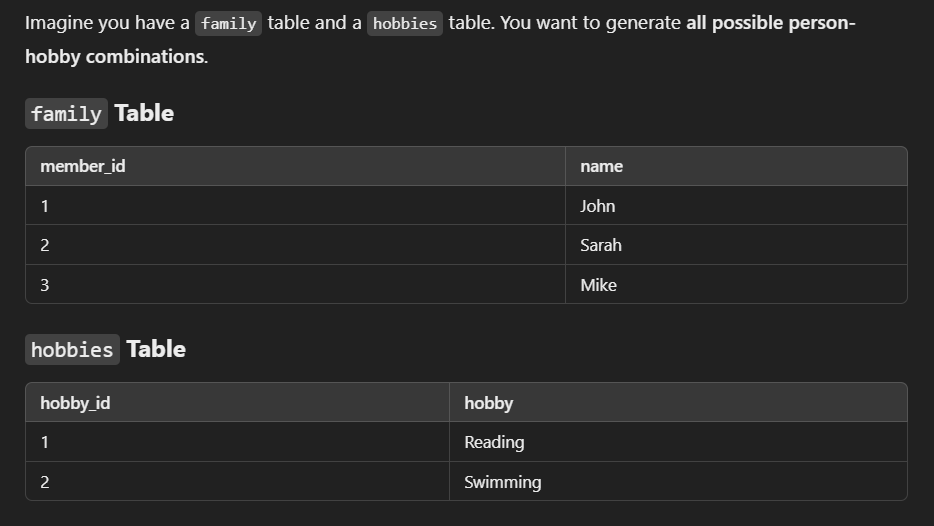

In [ ]:
SELECT f.name AS Person, h.hobby AS Hobby
FROM family f
CROSS JOIN hobbies h;

# Each row from family is paired with each row from hobbies.
# If family has 3 rows and hobbies has 2 rows, the result will have 3 × 2 = 6 rows.

## Natural join
A NATURAL JOIN is a type of INNER JOIN that automatically joins tables based on columns with the same name and data type in both tables.

Unlike INNER JOIN, where we explicitly define the joining condition (ON clause), NATURAL JOIN figures out the common columns automatically and joins on them.

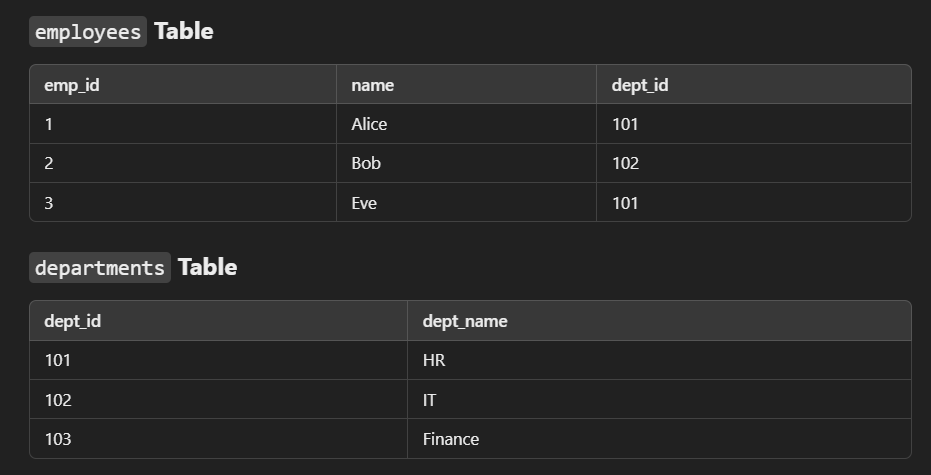

In [ ]:
SELECT * 
FROM employees
NATURAL JOIN departments;


# How This Works:
    # SQL automatically detects that both tables have a column called dept_id.
    # It joins the tables based on dept_id without needing an ON condition.
    # The result includes only rows where dept_id matches in both tables (like an INNER JOIN).

## Self join

A Self Join is when a table is joined with itself. It’s used when you need to compare rows within the same table. You treat the same table as two separate tables by using different aliases.

💡 Think of it as making two copies of the same table in memory and then joining them!

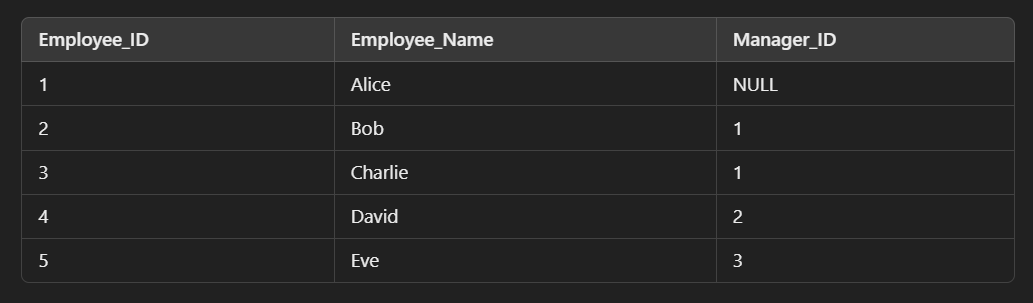

In [ ]:
# SQL Query to Find Employees and Their Managers
SELECT e1.Employee_Name AS Employee, 
       e2.Employee_Name AS Manager
FROM employees e1
LEFT JOIN employees e2
ON e1.Manager_ID = e2.Employee_ID;

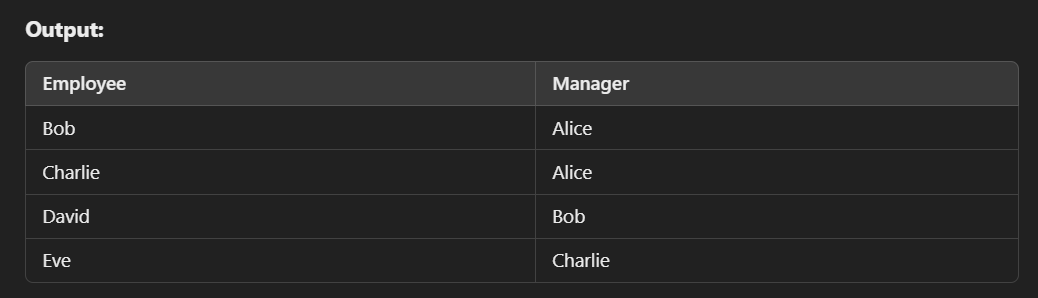
<br>

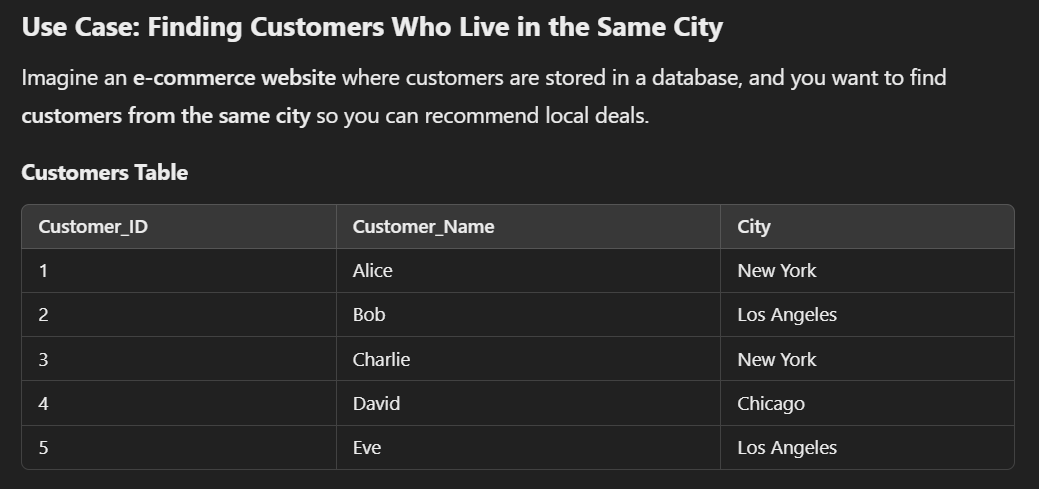

In [ ]:
# SQL Query to Find Customers from the Same City
SELECT c1.Customer_Name AS Customer1, 
       c2.Customer_Name AS Customer2, 
       c1.City
FROM customers c1
JOIN customers c2 
ON c1.City = c2.City 
AND c1.Customer_ID <> c2.Customer_ID;

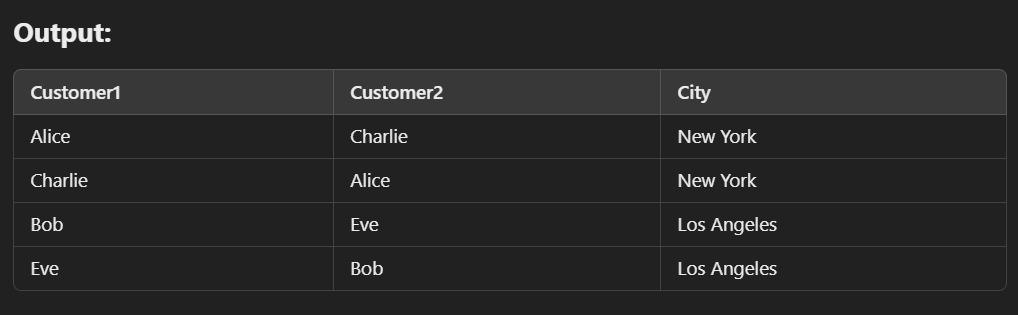

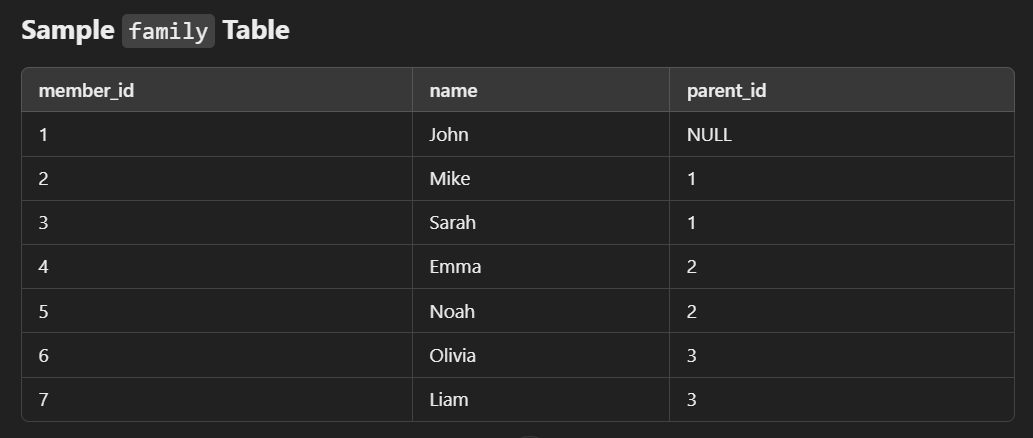

In [ ]:
SELECT c.name AS Child, 
       p.name AS Parent
FROM family c
JOIN family p
ON c.parent_id = p.member_id;


# WITH clause

##  What is the WITH Clause?
The WITH clause in SQL, also known as Common Table Expressions (CTE) or sub-query factoring, is used to define a temporary result set that can be referenced within a `SELECT`, `INSERT`, `UPDATE`, or `DELETE` statement.

**📌 Why Use the WITH Clause?**
- ✔ Improves Readability: Simplifies complex queries by breaking them into modular parts.
- ✔ Enhances Performance: The database engine executes the CTE once and reuses the result, avoiding redundant calculations.
- ✔ Recursive Queries: The WITH clause is essential for hierarchical data (e.g., organizational charts, tree structures).
- ✔ Easier Debugging: You can test each CTE separately.

**Syntax:**
    WITH cte_name AS (
        -- SQL query (Subquery)
    )
    SELECT * FROM cte_name;

- `cte_name`: Name of the Common Table Expression.
- The CTE can be referenced like a table in the `SELECT` statement.- 

In [ ]:
# Fetch employees who earn more than avaerage salary of all employees

with average_salary (avg_sal) as
            (select cast(avg(salary) as int) from employee)
select *
from employee e, average_salary av
where e.salary › av.avg_sal;

In the first line of above query that is "with average_salary `(avg_sal)` as", we have have specified `avg_sal` within parentheses. Its good practice to add column return by subquery. We can also write above query like this that is without parenthesis: 

In [ ]:
with average_salary as
		(select avg(salary) as avg_sal from employee)
select * 
from employee e, average_salary av
where e.salary > av.avg_sal;

# OR

with average_salary as
		(select cast(avg(salary) as int) as average_sal from employee)
select * 
from employee e, average_salary av
where e.salary > av.average_sal;

In [ ]:
# Find employees who earn more than the average salary.

WITH AvgSalary AS (
    SELECT dept_name, AVG(salary) AS avg_salary
    FROM employee
    GROUP BY dept_name
)
SELECT emp_name, salary, dept_name
FROM employee e
JOIN AvgSalary a ON e.dept_name = a.dept_name
WHERE e.salary > a.avg_salary;

**📌 How it Works?**
- 1️⃣ The CTE (AvgSalary) calculates the average salary per department.
- 2️⃣ The main query selects employees who earn above their department's average salary.



In [ ]:
# Find employees who have a salary greater than the company's average and their department's average.

WITH CompanyAvg AS (
    SELECT AVG(salary) AS avg_salary FROM employee
),
DeptAvg AS (
    SELECT dept_name, AVG(salary) AS dept_avg FROM employee GROUP BY dept_name
)
SELECT e.emp_name, e.salary, e.dept_name
FROM employee e
JOIN DeptAvg d ON e.dept_name = d.dept_name
WHERE e.salary > d.dept_avg
AND e.salary > (SELECT avg_salary FROM CompanyAvg);

**📌 How it Works?**
- 1️⃣ First CTE (CompanyAvg) calculates the company-wide average salary.
- 2️⃣ Second CTE (DeptAvg) calculates the average salary per department.
- 3️⃣ The main query selects employees who earn above both averages.

**Examples:**

Let's say we have `Sales` table that have columns: store_id, store_name, product_name, quantity, and cost. And we want to find stores who's sales where better than the avg sales across all stores.

We can break above problem into 3 sub problem:

	-- 1. total slaes per each store, let's say Total_sales:
		`select s.store_id, sum(cost) as total_sales_per_store
		from sales s
		group by s.store_id;`
		
	-- 2. find avg sales with respect all stores, let's say Avg_sales:
		`select cast(avg(total_sales_per_store) as int) as avg_sales_for_all_stores
		from (	select s.store_id, sum(cost) as total_sales_per_store
				from sales s
				group by s.store_id) x;`
	
	-- 3. find stores where Total_sales > Avg_sales of all stores:
		`select *
		from	(select s.store_id, sum(cost) as total_sales_per_store
				from sales s
				group by s.store_id) total_sales
		join	(select cast(avg(total_sales_per_store) as int) as avg_sales_for_all_stores
				from (	select s.store_id, sum(cost) as total_sales_per_store
						from sales s
						group by s.store_id) x) avg_sales
		on total_sales.total_sales_per_store > avg_sales.avg_sales_for_all_stores;`

there are several problems with above sol as we are using multiple subquery and also we are repeating query or subquery multiple times

When we have this kind of scenario where we are repeating same subquery mutiple times or query has become too big or complex to read then this is great scenario where we should use with clause.

<code>
with Total_sales (store_id, total_sales_per_store) as 
		(select s.store_id, sum(cost) as total_sales_per_store
		from sales s
		group by s.store_id),
	Avg_sales (avg_sales_for_all_stores) as
		(select cast(avg(total_sales_per_store) as int) as avg_sales_for_all_stores
		from Total_sales)
select *
from Total_sales ts
join Avg_sales av
on ts.total_sales_per_store > av.avg_sales_for_all_stores;
</code>

<br>
Ideal secnario to use with clause is when we trying to use a particular subquery
mutiple times. Also when query is getting complex and hard to read.
Also when we are dealing with millions of data and we need to work on some particular
data then we can filter those data using with clause

## Using WITH Clause in `INSERT`, `UPDATE`, and `DELETE`

### (A) WITH Clause in `INSERT`

In [ ]:
# 🎯 Insert employees who earn more than the average salary into a new table (high_salary_employees).

WITH HighEarners AS (
    SELECT emp_id, emp_name, salary
    FROM employee
    WHERE salary > (SELECT AVG(salary) FROM employee)
)
INSERT INTO high_salary_employees (emp_id, emp_name, salary)
SELECT * FROM HighEarners;

# ✔ This avoids writing the same subquery twice.

### (B) WITH Clause in `UPDATE`

In [ ]:
# 🎯 Increase the salary of employees who earn below the department average by 10%.

WITH DeptAvg AS (
    SELECT dept_name, AVG(salary) AS avg_salary
    FROM employee
    GROUP BY dept_name
)
UPDATE employee
SET salary = salary * 1.1
WHERE (dept_name, salary) IN (
    SELECT dept_name, salary FROM DeptAvg WHERE salary < avg_salary
);

# ✔ Using WITH, we calculate the average salary once and reuse it.

### (C) WITH Clause in `DELETE`

In [ ]:
# 🎯 Delete employees who earn below the company’s lowest salary.

WITH MinSalary AS (
    SELECT MIN(salary) AS min_salary FROM employee
)
DELETE FROM employee
WHERE salary < (SELECT min_salary FROM MinSalary);

# ✔ Deletes only employees whose salary is lower than the minimum recorded salary.

## Recursive WITH Clause (Advanced Concept)

**What is a Recursive CTE?**
    
A recursive CTE is used for hierarchical or tree-like data (e.g., organizational structures, category hierarchies).

In [ ]:
# Find the hierarchy of managers and employees.

WITH RECURSIVE EmployeeHierarchy AS (
    -- Base Case: Select the top-level manager
    SELECT emp_id, emp_name, manager_id, 1 AS level
    FROM employee
    WHERE manager_id IS NULL

    UNION ALL

    -- Recursive Case: Select employees reporting to a manager
    SELECT e.emp_id, e.emp_name, e.manager_id, h.level + 1
    FROM employee e
    JOIN EmployeeHierarchy h ON e.manager_id = h.emp_id
)
SELECT * FROM EmployeeHierarchy;

**📌 How it Works?**- 
- 1️⃣ Base Case: Selects top-level managers (who have no manager_id).
- 2️⃣ Recursive Case: Finds employees who report to the previously selected employees.
- 3️⃣ Repeats until no more employees are found.

✔ This helps in querying hierarchical data (e.g., company structure, product categories, tree-based relationships).

## Performance Optimization with CTE

**🚀 When to Use CTE Over Subqueries?** 
- ✅ When the same subquery is used multiple times.
- ✅ When dealing with hierarchical data.
- ✅ When improving query readability and debugging.

**🚨 When to Avoid CTEs?** 
- ❌ If the CTE is not referenced multiple times, a subquery or temporary table may be faster.
- ❌ If the database does not optimize CTEs well (some DBMS materialize the CTE, causing performance issues).

## Comparison: `WITH` vs. Subqueries vs. Temporary Tables

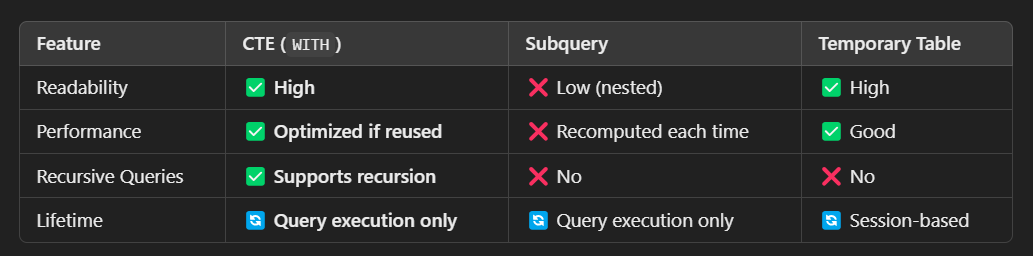

### Key Takeaways
- ✔ The WITH clause improves query readability and efficiency.
- ✔ Multiple CTEs can be used in the same query (chained CTEs).
- ✔ Recursive CTEs are useful for hierarchical data.
- ✔ CTEs are temporary and exist only during query execution.
- ✔ For better performance, use JOINs or indexing in some cases.

# Materialized CTEs for Optimization (Persistent CTEs)

**📌 What is a Materialized CTE?**
- In some databases (like PostgreSQL, SQL Server), CTEs can be materialized (cached) to improve performance.
- Materialization stores the CTE result in memory (or temp storage), so it doesn’t recompute every time it is used.
- However, not all databases automatically materialize CTEs (some inline them like subqueries).

## PostgreSQL: Using MATERIALIZED Hint

In [ ]:
WITH MATERIALIZED AvgSalary AS (
    SELECT dept_name, AVG(salary) AS avg_salary
    FROM employee
    GROUP BY dept_name
)
SELECT emp_name, salary, dept_name
FROM employee e
JOIN AvgSalary a ON e.dept_name = a.dept_name
WHERE e.salary > a.avg_salary;


**How it Works?**
- ✔ AvgSalary is computed once and stored.
- ✔ The main query fetches results from the materialized CTE without recomputing.
- ✔ Optimized for large datasets.

## When is CTE Materialization Useful?
- ✅ CTE is used multiple times in the query
- ✅ Large dataset processing (avoiding recomputation)
- ✅ Expensive aggregations (e.g., AVG, SUM, COUNT)

## When is CTE Materialization NOT Useful?
- ❌ If the CTE is only used once, a subquery may be faster
- ❌ If the DBMS automatically inlines the CTE (MySQL, Oracle), materialization won’t help

## 📌 Example: Without Materialization (Repeated Computation)

In [ ]:
WITH AvgSalary AS (
    SELECT dept_name, AVG(salary) AS avg_salary
    FROM employee
    GROUP BY dept_name
)
SELECT e1.emp_name, e1.salary
FROM employee e1
JOIN AvgSalary a ON e1.dept_name = a.dept_name
WHERE e1.salary > a.avg_salary
AND EXISTS (
    SELECT 1 FROM employee e2 WHERE e2.dept_name = e1.dept_name AND e2.salary > a.avg_salary
);


**Problem:** The CTE is recomputed twice in the EXISTS condition.

**Solution:** Materialized CTE

In [ ]:
WITH MATERIALIZED AvgSalary AS (
    SELECT dept_name, AVG(salary) AS avg_salary
    FROM employee
    GROUP BY dept_name
)
SELECT e1.emp_name, e1.salary
FROM employee e1
JOIN AvgSalary a ON e1.dept_name = a.dept_name
WHERE e1.salary > a.avg_salary
AND EXISTS (
    SELECT 1 FROM employee e2 WHERE e2.dept_name = e1.dept_name AND e2.salary > a.avg_salary
);


✔ Now, AvgSalary is calculated once and reused efficiently.

### Does Your DBMS Materialize CTEs?
- ✅ PostgreSQL, SQL Server: Supports explicit materialization.
- ❌ MySQL, Oracle: Inline CTEs by default (no materialization).
- Check with EXPLAIN ANALYZE to see if your CTE is materialized.

# Recursive vs. Non-Recursive CTEs

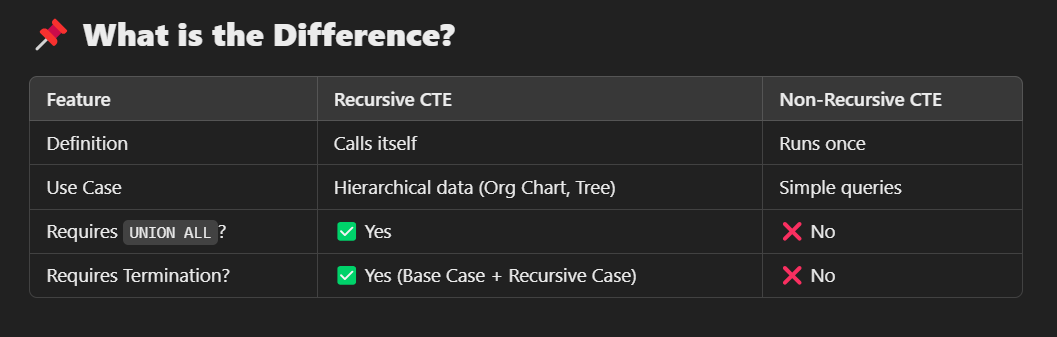

## 📌 Example of Non-Recursive CTE
🎯 Find the top 5 highest-paid employees.

In [ ]:
WITH TopSalaries AS (
    SELECT emp_name, salary
    FROM employee
    ORDER BY salary DESC
    LIMIT 5
)
SELECT * FROM TopSalaries;


✔ No recursion, just a simple table transformation.

## 📌 Example of Recursive CTE
🎯 Find all employees reporting to a manager (Hierarchy).

In [ ]:
WITH RECURSIVE EmployeeHierarchy AS (
    -- Base Case: Select the CEO (top manager)
    SELECT emp_id, emp_name, manager_id, 1 AS level
    FROM employee
    WHERE manager_id IS NULL

    UNION ALL

    -- Recursive Case: Find employees reporting to the previous level
    SELECT e.emp_id, e.emp_name, e.manager_id, h.level + 1
    FROM employee e
    JOIN EmployeeHierarchy h ON e.manager_id = h.emp_id
)
SELECT * FROM EmployeeHierarchy;


- ✔ Recursively finds all employees reporting to managers at different levels.
- ✔ Stops when there are no more employees reporting.

# Temporary Table
A temporary table in SQL is a table that exists only for the duration of a session or transaction. It is used to store intermediate results temporarily and is automatically deleted once the session ends or when explicitly dropped.

We have two syntax for temporary tabel. One used in SQL server and other used in MySQL, PostgreSQL.

## 1. SQL Server

It supports two types of temporary table:

### Local Temporary Table (`#temp`)

- Created using `#` before the table name.
- Only accessible within the session that created it.
- Automatically deleted when the session ends.- 

In [ ]:
CREATE TABLE #TempCustomers (
    ID INT,
    Name VARCHAR(100)
);

INSERT INTO #TempCustomers VALUES (1, 'John'), (2, 'Doe');

SELECT * FROM #TempCustomers; -- Accessible only within this session

### Global Temporary Table (`##temp`)

- Created using `##` before the table name.
- Accessible by multiple sessions.
- Automatically deleted when all sessions using it are closed.

In [ ]:
CREATE TABLE ##GlobalTemp (
    ID INT,
    Name VARCHAR(100)
);

INSERT INTO ##GlobalTemp VALUES (1, 'Alice');

SELECT * FROM ##GlobalTemp; -- Accessible by other sessions


- Temporary tables are stored in the `tempdb` database.
- They improve query performance by storing intermediate results.
- They prevent clutter in the main database as they are automatically dropped.

## 2. MySQL, PostgreSQL 

- The TEMPORARY keyword ensures that the table is only available for the current session.
- The table gets automatically dropped when the session ends.
- It works in MySQL and PostgreSQL, but SQL Server does not support the CREATE TEMPORARY TABLE syntax (instead, SQL Server uses `#` for local and `##` for global temporary tables).

In [ ]:
CREATE TEMPORARY TABLE TempOrders (
   OrderID INT PRIMARY KEY,
   CustomerName VARCHAR(100),
   OrderDate DATE
);

INSERT INTO TempOrders VALUES (1, 'Alice', '2025-03-16');

SELECT * FROM TempOrders; -- Works within the session


## Real-life use case

### E-commerce: Storing User's Cart Items Temporarily
**Scenario:**
An online shopping website stores cart items temporarily before the user checks out.

Solution using a Temporary Table:

In [ ]:
CREATE TEMPORARY TABLE TempCart (
    UserID INT,
    ProductID INT,
    Quantity INT,
    Price DECIMAL(10,2),
    PRIMARY KEY (UserID, ProductID)
);

INSERT INTO TempCart VALUES (101, 202, 2, 499.99), (101, 303, 1, 799.50);

SELECT * FROM TempCart; -- User can review their cart before checkout

# The cart data is deleted automatically when the session ends.

### Banking: Processing Monthly Statements
**Scenario:**
A bank generates a monthly statement by filtering transactions within a date range.

Solution using a Temporary Table:

In [ ]:
CREATE TEMPORARY TABLE TempTransactions AS
SELECT AccountID, TransactionDate, Amount, TransactionType
FROM Transactions
WHERE TransactionDate BETWEEN '2025-03-01' AND '2025-03-31';

SELECT * FROM TempTransactions; -- Used for further processing


# This avoids modifying the actual Transactions table while generating reports.

### Data Analysis: Aggregating Large Data Sets
**Scenario:**
A data analyst wants to calculate total sales per customer before generating a final report.

Solution using a Temporary Table:

In [ ]:
CREATE TEMPORARY TABLE TempSales AS
SELECT CustomerID, SUM(Sales) AS TotalSales
FROM Orders
WHERE OrderDate >= '2025-01-01'
GROUP BY CustomerID;

SELECT * FROM TempSales ORDER BY TotalSales DESC; -- Generate report


# This reduces the load on the main Orders table and speeds up reporting.

### Logistics: Tracking Orders in Transit
**Scenario:**
A logistics company tracks orders currently in transit.

Solution using a Temporary Table:

In [ ]:
CREATE TEMPORARY TABLE TempInTransit AS
SELECT OrderID, CustomerID, DeliveryDate
FROM Orders
WHERE Status = 'In Transit';

SELECT * FROM TempInTransit; -- Monitor pending deliveries

# This improves query performance when tracking real-time shipments.

### Social Media: Fetching a User's Latest Posts
**Scenario:**
A social media app displays the latest posts of a user for fast access.

Solution using a Temporary Table:

In [ ]:
CREATE TEMPORARY TABLE TempRecentPosts AS
SELECT PostID, UserID, Content, PostDate
FROM Posts
WHERE UserID = 12345
ORDER BY PostDate DESC
LIMIT 10;

SELECT * FROM TempRecentPosts; -- Show recent posts in the feed

# This prevents repeated queries on the main Posts table, improving performance.

# Window function

## 📌 What is a Window Function?
- A window function performs a calculation across a set of rows related to the current row within a result set.
- Unlike `GROUP BY`, window functions do not collapse rows, allowing detailed row-wise calculations.

**Syntax:** <code><window_function> OVER (
    [PARTITION BY <columns>] 
    [ORDER BY <columns>] 
    [ROWS or RANGE BETWEEN <frame>]
)</code>

- ✔ PARTITION BY – Divides rows into groups (optional).
- ✔ ORDER BY – Defines row order within each partition.
- ✔ ROWS or RANGE – Defines the frame for computation (optional).

<br>

**Examples:**

- select e.*, max (salary) over() as max_salary from employee e;
- select e.*, max (salary) over(partition by dept_name) as max_salary from employee e;

<br>

**Types of Window Functions:**
                                     
- ✅ Ranking Functions – `ROW_NUMBER()`, `RANK()`, `DENSE_RANK()`, `NTILE(N)`
- ✅ Aggregate Functions – `SUM()`, `AVG()`, `COUNT()`, `MIN()`, `MAX()`
- ✅ Value Functions – `LEAD()`, `LAG()`, `FIRST_VALUE()`, `LAST_VALUE()`
- ✅ Running Total & Moving Averages – `SUM() OVER()`, `AVG() OVER()`
- ✅ Cumulative & Sliding Aggregates – `ROWS BETWEEN`, `RANGE BETWEEN`

## Ranking Functions

### 1. ROW_NUMBER()
ROW_NUMBER() is a window function that assigns a unique sequential number to each row within a partition of a result set.

- It does NOT guarantee a fixed order unless ORDER BY is used.
- It resets for each partition when PARTITION BY is used.
- Assigns a unique sequential number within each partition.
- Duplicates get different row numbers.

**Syntax:** `ROW_NUMBER() OVER ([PARTITION BY column] ORDER BY column)`

- ✔ PARTITION BY – (Optional) Divides data into groups.
- ✔ ORDER BY – Defines sorting within each partition.

In [ ]:
# Basic ROW_NUMBER() Without Partition

SELECT emp_id, emp_name, dept_name, salary, 
       ROW_NUMBER() OVER (ORDER BY salary DESC) AS row_num
FROM employees;


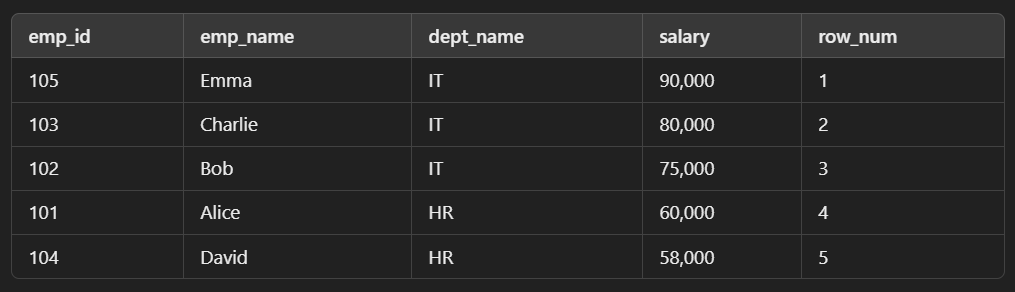

In [ ]:
# ROW_NUMBER() With PARTITION BY

SELECT emp_id, emp_name, dept_name, salary, 
       ROW_NUMBER() OVER (PARTITION BY dept_name ORDER BY salary DESC) AS row_num
FROM employees;


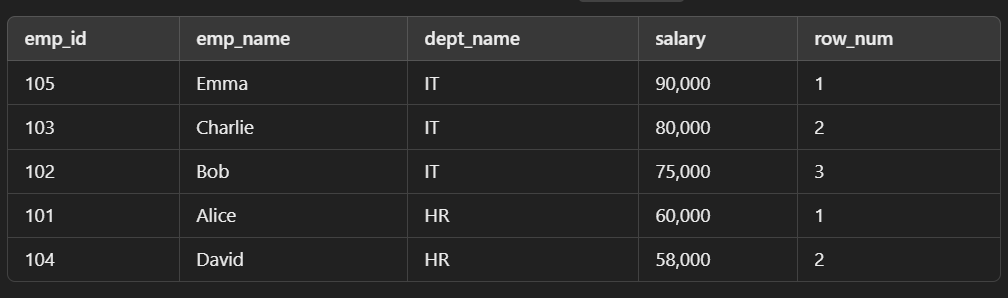

In [ ]:
select * from (
select e.*,
row_number() over(partition by dept_name) as rn
from employee;

In [ ]:
# first 2 employees from each department to join the company

select * from (
select e.*,
row_number() over(partition by dept_name order by emp_id) as rn
from employee) x
where x.rn ‹ 3;

In [ ]:
SELECT emp_name, dept_name, salary,
       ROW_NUMBER() OVER(PARTITION BY dept_name ORDER BY salary DESC) AS row_num
FROM employee;


**Use Cases of ROW_NUMBER()**
- ✅ Select the top N rows from each group.
- ✅ Remove duplicates by keeping only the first row.
- ✅ Implement pagination in SQL queries.

### 2. RANK()
- assigns the same rank to duplicate values, but the next rank is skipped.

In [ ]:
SELECT emp_id, emp_name, dept_name, salary, 
       RANK() OVER (ORDER BY salary DESC) AS rank_pos
FROM employees;


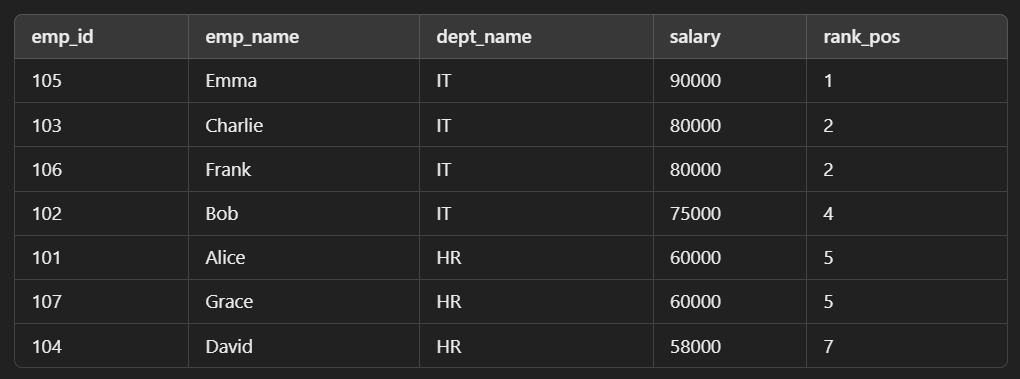

**Explanation:**- 

- Both Charlie and Frank have a salary of 80,000, so they get rank 2.
- The next rank is 4 (rank 3 is skipped).
- Alice and Grace both have a salary of 60,000, so they get rank 5.
- The next rank is 7 (rank 6 is skipped).

In [ ]:
SELECT emp_name, dept_name, salary,
       RANK() OVER(PARTITION BY dept_name ORDER BY salary DESC) AS rank
FROM employee;


✔ Use Case – Find ranked positions with gaps.

In [ ]:
# Fetch the top 3 employees in each department earning the max salary.

select * from(
    select e.*,
    rank() over(partition by dept_name order by salary desc)
    as rnk from employee e) x
where x.rnk<4;

###  3. DENSE_RANK()
- assigns the same rank to duplicate values, but does NOT skip ranks.

In [ ]:
SELECT emp_id, emp_name, dept_name, salary, 
       DENSE_RANK() OVER (ORDER BY salary DESC) AS dense_rank_pos
FROM employees;


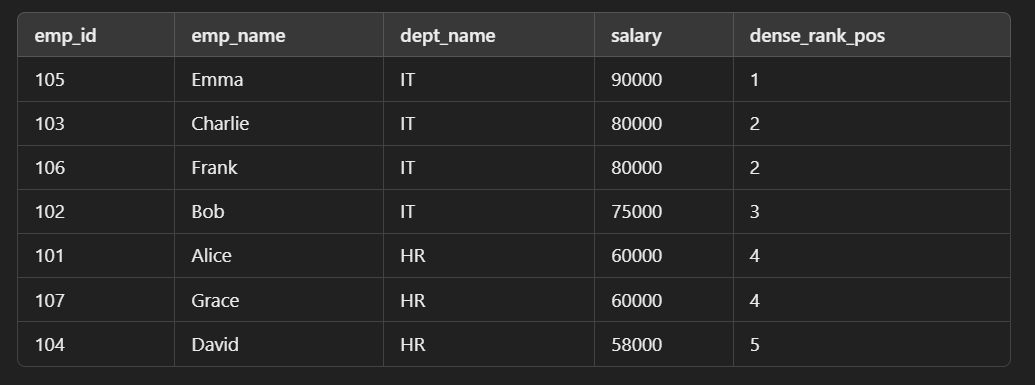

**Explanation:**

- Both Charlie and Frank have a salary of 80,000, so they get rank 2.
- The next rank is 3 (NO rank is skipped).
- Alice and Grace both have a salary of 60,000, so they get rank 4.
- The next rank is 5 (NO rank is skipped).

In [ ]:
# RANK() vs DENSE_RANK() with PARTITION BY

SELECT emp_id, emp_name, dept_name, salary, 
       RANK() OVER (PARTITION BY dept_name ORDER BY salary DESC) AS rank_dept,
       DENSE_RANK() OVER (PARTITION BY dept_name ORDER BY salary DESC) AS dense_rank_dept
FROM employees;


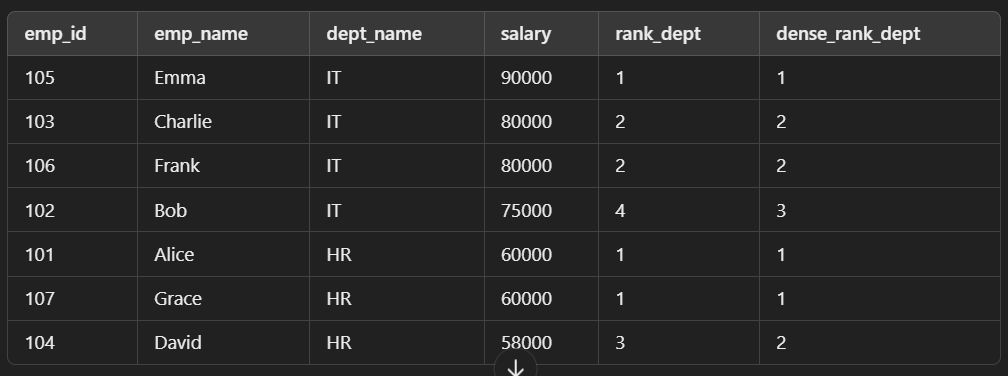

In [ ]:
SELECT emp_name, dept_name, salary,
       DENSE_RANK() OVER(PARTITION BY dept_name ORDER BY salary DESC) AS dense_rank
FROM employee;


✔ Use Case – Remove gaps in ranking for reporting.

In [ ]:
select * from(
    select e.*,
    dense_rank() over(partition by dept_name order by salary desc)
    as dense_rnk from employee e) x
where x.dense_rnk<4;

In [ ]:
select e.*,
rank() over(partition by dept_name order by salary desc) as rnk,
dense_rank() over(partition by dept_name order by salary desc) as DENSE_rnk,
row_number() over(partition by dept_name order by salary desc) as rn
from employee e;

### 4. NTILE(N)
NTILE(n) is a window function that divides ordered rows into n equal parts (or as equal as possible) and assigns each row a bucket number starting from 1 to n.

- It is useful for percentile ranking, performance grading, and equally distributing data.
- If the number of rows is not evenly divisible by n, the first few buckets will have one extra row.

In [ ]:
SELECT emp_id, emp_name, salary,
       NTILE(4) OVER (ORDER BY salary DESC) AS quartile
FROM employees;


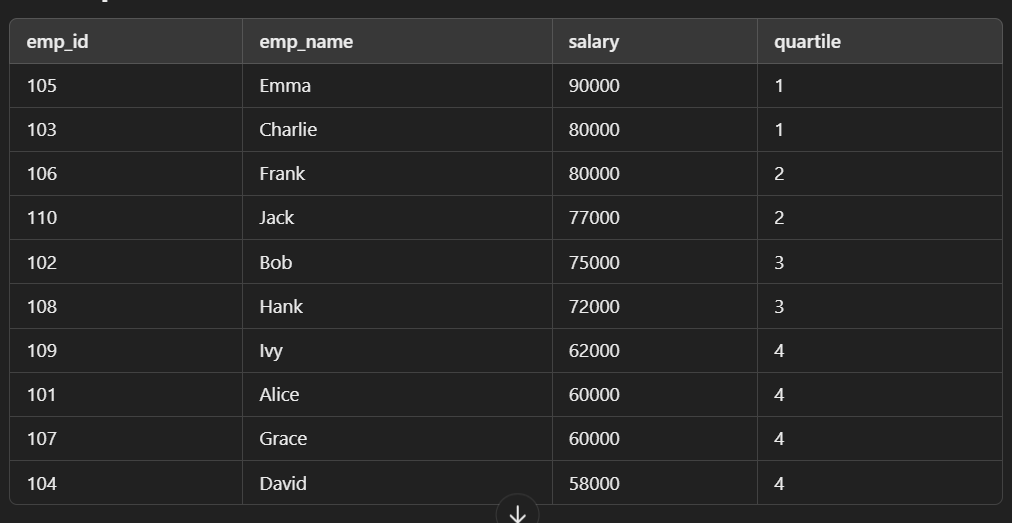

**Explanation:**

- The highest salaries are placed in quartile 1.
- The lowest salaries are placed in quartile 4.
- Since NTILE(4) creates 4 groups and we have 10 rows, the first 2 groups get 2 rows each, and the remaining get 3 rows each.


In [ ]:
SELECT emp_id, emp_name, dept_name, salary,
       NTILE(3) OVER (PARTITION BY dept_name ORDER BY salary DESC) AS dept_quartile
FROM employees;


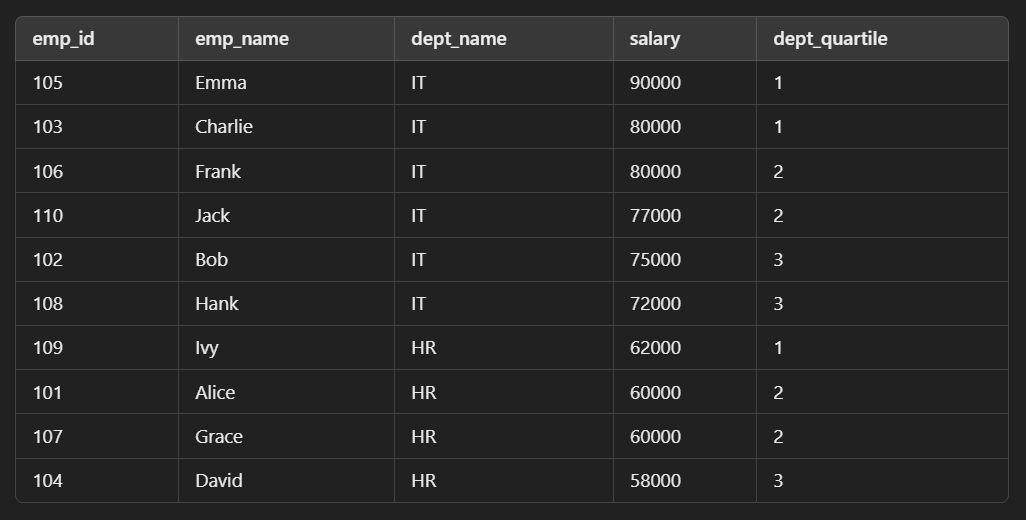

**Explanation:**

- Employees within each department are divided into 3 groups.
- The highest salary in each department is in group 1.
- The lowest salary in each department is in group 3.

In [ ]:
# Suppose we want to divide employees into 10 deciles (percentiles).

SELECT emp_id, emp_name, salary,
       NTILE(10) OVER (ORDER BY salary DESC) AS percentile
FROM employees;

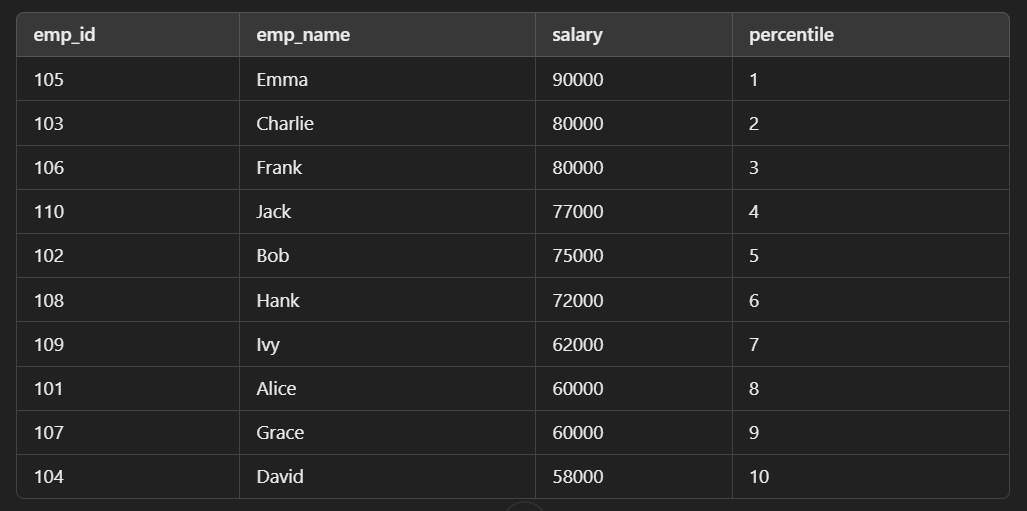

**Explanation:**

- Employees are divided into 10 equal parts (deciles).
- The highest salaries are in percentile 1.
- The lowest salaries are in percentile 10.

✔ Use Case – Divide employees into quartiles based on salary.

In [ ]:
# Write a query to segregate all the expensive phones, mid range phones and the cheaper phones.

select product_name,
case when x.buckets = 1 then 'Expensive Phones'
    when x.buckets = 2 then 'Mid Range Phones'
    when x.buckets = 3 then 'Cheaper Phones' END phone_category
from (
    select *,
    ntile(3) over (order by price desc) as buckets
    from product
    where product_category='Phone') x ;

## Aggregate Window Functions

Window aggregate functions allow us to apply aggregate calculations (SUM, AVG, COUNT, MIN, MAX, etc.) across a set of rows without collapsing them into a single result. They are used with the OVER() clause, which defines the partitioning and ordering.

**Syntax:** <code>
    AGGREGATE_FUNCTION(column_name) OVER (
    PARTITION BY column_name 
    ORDER BY column_name ROWS BETWEEN frame_start AND frame_end
)</code>

- AGGREGATE_FUNCTION → Can be `SUM()`, `AVG()`, `COUNT()`, `MIN()`, or `MAX()`.
- PARTITION BY → Divides the dataset into groups (optional).
- ORDER BY → Defines the sequence within each partition.
- ROWS BETWEEN → Defines the window frame (optional).

In [ ]:
SELECT sale_id, customer_id, sale_date, amount,
       SUM(amount) OVER (ORDER BY sale_date) AS running_total
FROM sales;


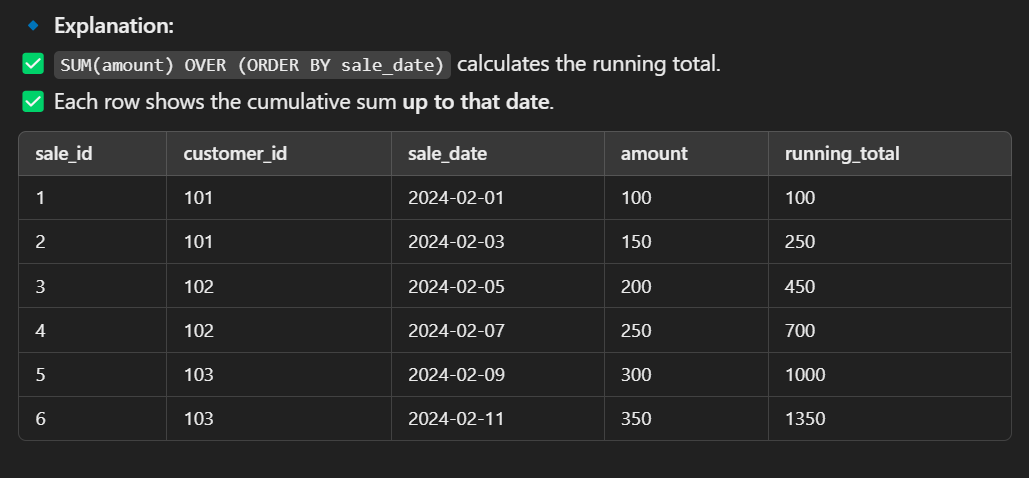

In [ ]:
SELECT sale_id, customer_id, sale_date, amount,
       AVG(amount) OVER (ORDER BY sale_date ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS moving_avg
FROM sales;


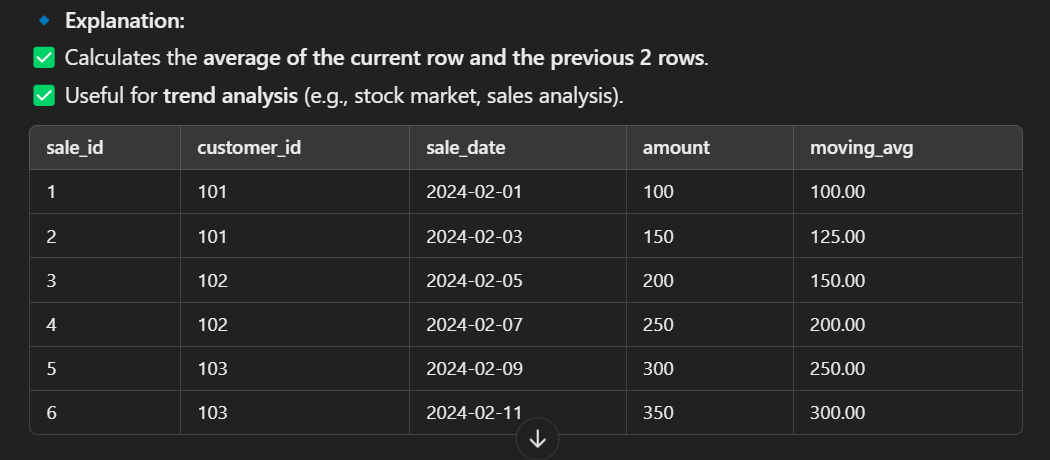

In [ ]:
SELECT sale_id, customer_id, sale_date, amount,
       COUNT(sale_id) OVER (PARTITION BY customer_id ORDER BY sale_date) AS sales_count
FROM sales;


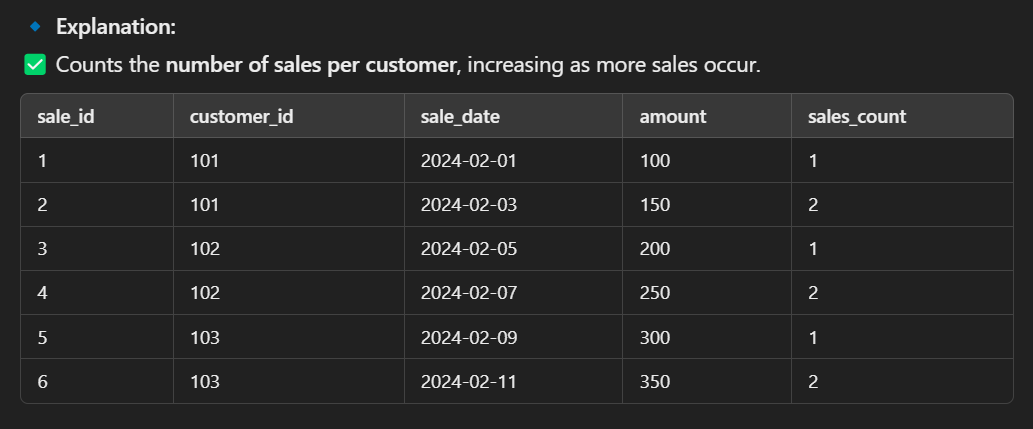

In [ ]:
SELECT sale_id, customer_id, sale_date, amount,
       MIN(amount) OVER (PARTITION BY customer_id ORDER BY sale_date) AS min_sale
FROM sales;


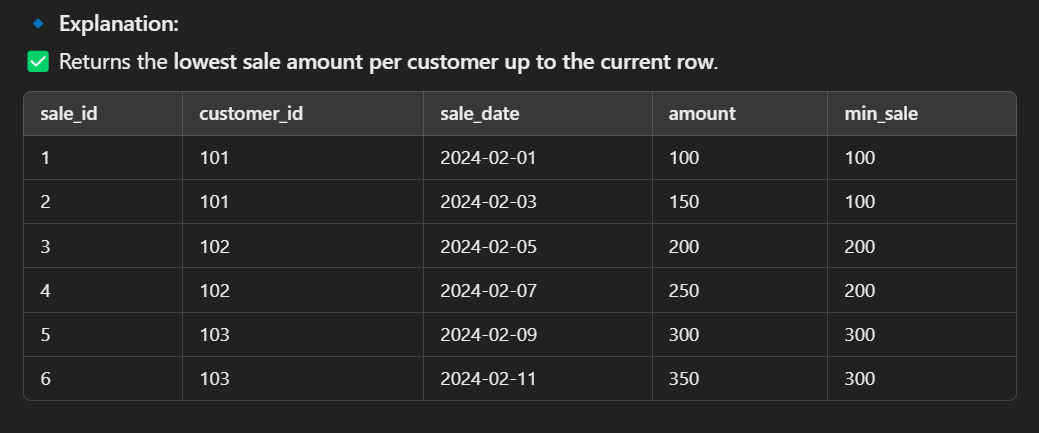

In [ ]:
SELECT sale_id, customer_id, sale_date, amount,
       MAX(amount) OVER (PARTITION BY customer_id ORDER BY sale_date) AS max_sale
FROM sales;


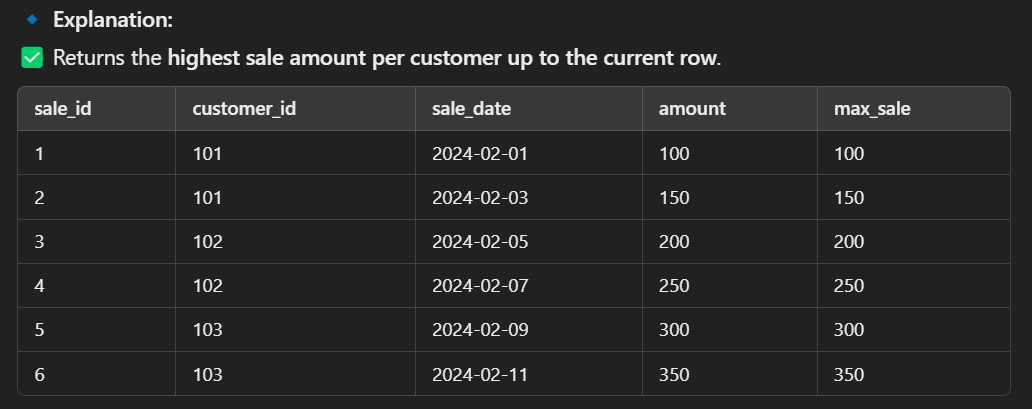

✅ Use ROWS BETWEEN to define a moving window (e.g., last 3 rows, last 7 days, etc.).

## 1. Running Total

In [ ]:
SELECT sale_id, sale_date, amount,
       SUM(amount) OVER (ORDER BY sale_date) AS running_total
FROM sales;


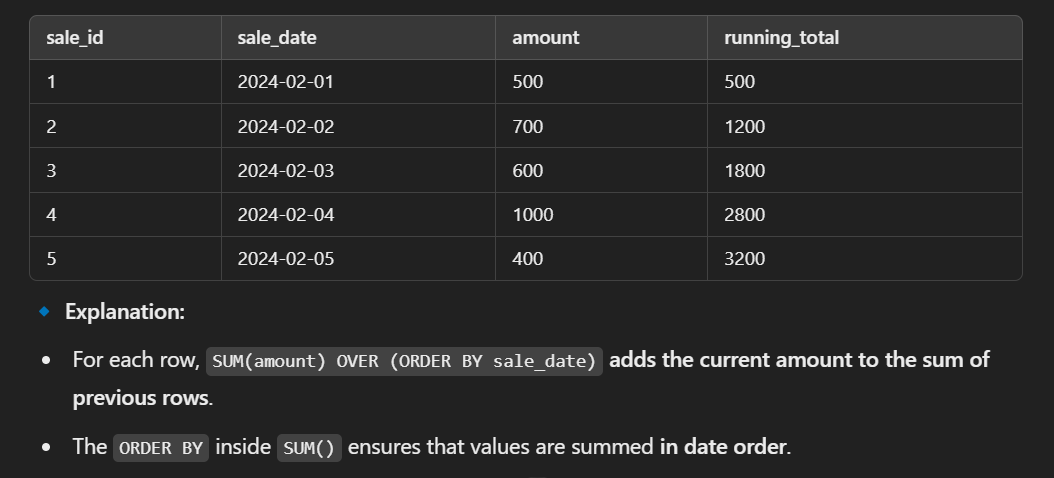

✔ Use Case – Calculate department-wise cumulative salary.

In [ ]:
SELECT sale_id, sale_date, region, amount,
       SUM(amount) OVER (PARTITION BY region ORDER BY sale_date) AS running_total
FROM sales;

# This ensures that totals reset when the region changes.

##  2. Moving Average (3-month window)


In [ ]:
SELECT sale_id, sale_date, amount,
       AVG(amount) OVER (ORDER BY sale_date ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS moving_avg
FROM sales;


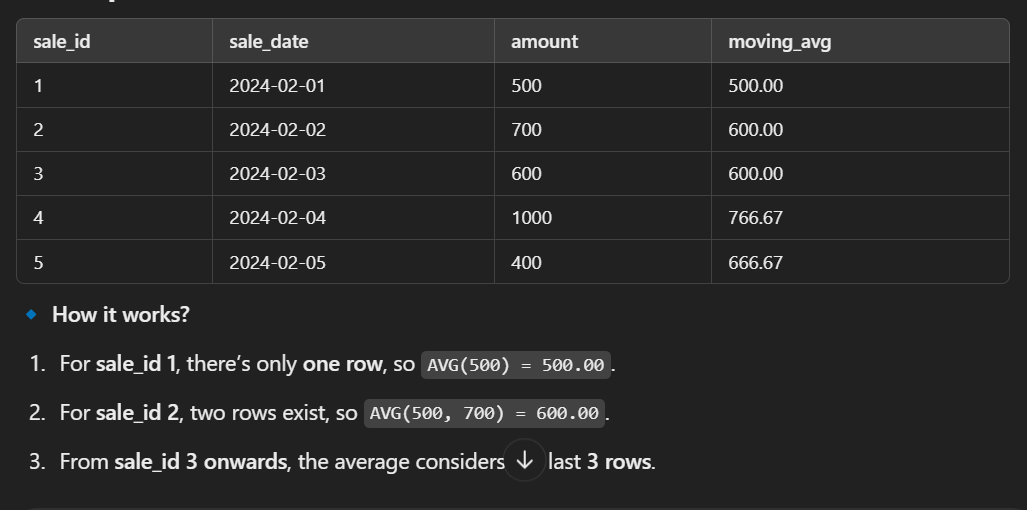

✔ Use Case – Smooth salary trends using moving average.

In [ ]:
SELECT sale_id, sale_date, region, amount,
       AVG(amount) OVER (PARTITION BY region ORDER BY sale_date ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS moving_avg
FROM sales;


## Value Window Functions

### 1. LAG() – Previous Row Value

- Compare current row with the previous row (e.g., sales change over time).
- Retrieves the previous row’s value (without JOIN)

**Syntax:** `LAG(column_name, offset, default_value) OVER (ORDER BY column_name)`

- offset → How many rows before the current row (default is 1).
- default_value → Used when there is no previous row (default is NULL).

In [ ]:
SELECT sale_id, sale_date, amount,
       LAG(amount, 1, 0) OVER (ORDER BY sale_date) AS previous_day_sales
FROM sales;


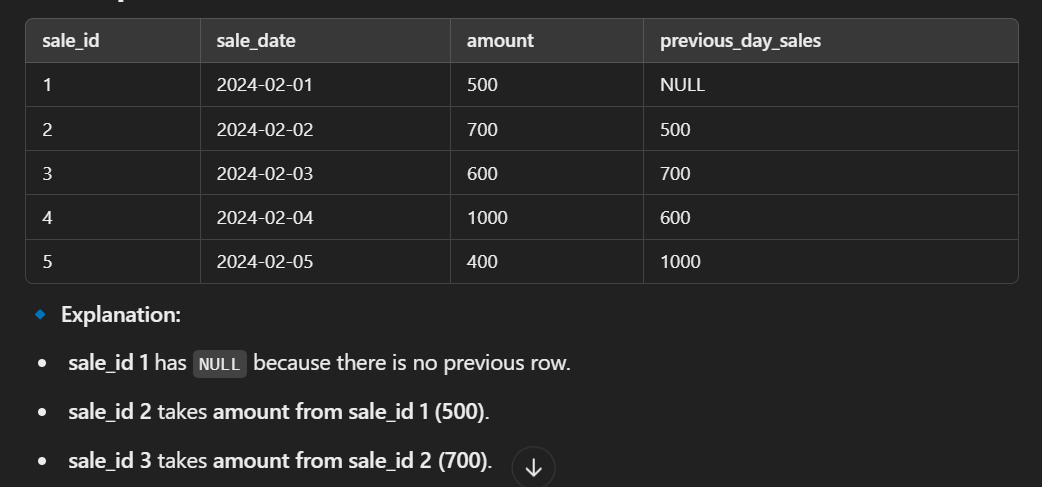

✔ Use Case – Compare current vs. previous salary.

In [ ]:
# fetch a query to display if the salary of an employee is higher, lower or equal to the previous employee.

select e.*,
lag(salary) over (partition by dept_name order by emp_id) as prev_emp_salary
from employee e;

# first employee value will NULL

In [ ]:
# fetch a query to display if the salary of an employee is higher, lower or equal to the previous employee.

select e.*,
lag(salary, 2, 0) over (partition by dept_name order by emp_id) as prev_emp_salary
from employee e;

# 3 means look for previous 2 data
# 0 default value 

### 2. LEAD() – Next Row Value

- Retrieves the next row’s value (without JOIN).

**Syntax:** `LEAD(column_name, offset, default_value) OVER (ORDER BY column_name)`

- offset → How many rows ahead to look (default is 1).
- default_value → Used when there is no next row (default is NULL).

In [ ]:
SELECT sale_id, sale_date, amount,
       LEAD(amount, 1, 0) OVER (ORDER BY sale_date) AS next_day_sales
FROM sales;


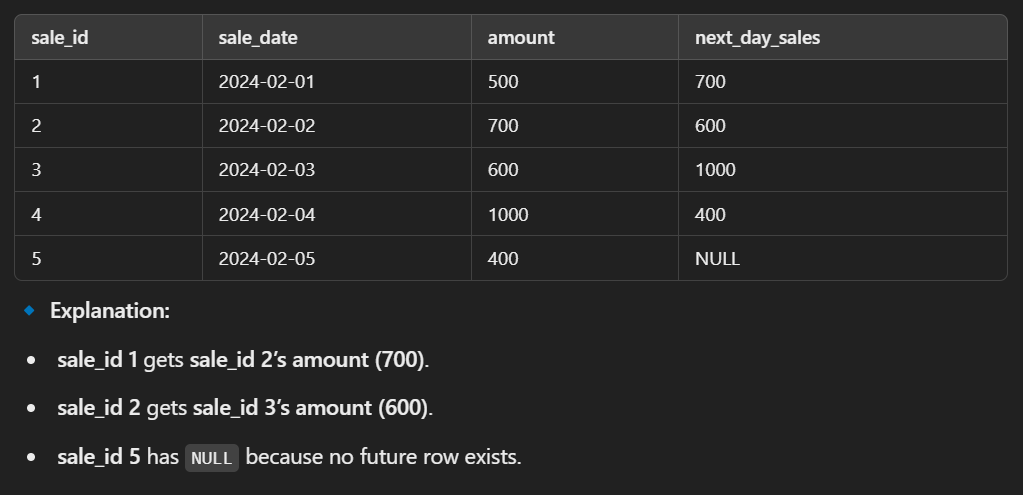

✔ Use Case – Compare current vs. next salary.

In [ ]:
# Advanced Usage: Calculate Day-over-Day Difference

SELECT sale_id, sale_date, amount,
       amount - LAG(amount, 1, 0) OVER (ORDER BY sale_date) AS sales_change
FROM sales;


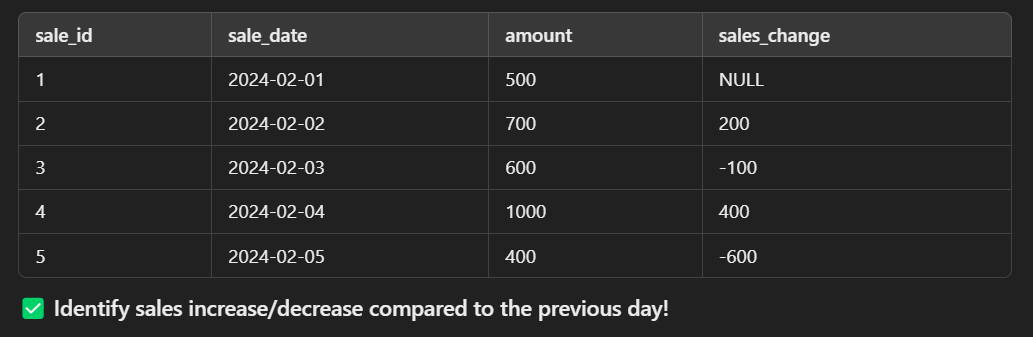

In [ ]:
# fetch a query to display if the salary of an employee is higher, lower or equal to the previous employee.

select e.*,
lag(salary) over (partition by dept_name order by emp_id) as prev_emp_salary,
lead(salary) over (partition by dept_name order by emp_id) as next_emp_salary
from employee e;


In [ ]:
select e.*,
    lag (salary) over (partition by dept_name order by emp_id as prev_emp_salary,
    case when e.salary > lag(salary) over (partition by dept_name order by emp_id) then 'Higher than previous employee'
    when e.salary < lag(salary) over (partition by dept_name order by emp_id) then 'Lower than previous employee'
    when e. salary = lag(salary) over (partition by dept_name order by emp_id) then 'Same as than previous employee'
    end sal_range
from employee e;

### 3. FIRST_VALUE() – First Row in Partition

Retrieves the first value in an ordered partition.

**Syntax:** `FIRST_VALUE(column_name) OVER (PARTITION BY column_name ORDER BY column_name)`


In [ ]:
SELECT sale_id, customer_id, sale_date, amount,
       FIRST_VALUE(amount) OVER (PARTITION BY customer_id ORDER BY sale_date) AS first_purchase
FROM sales;


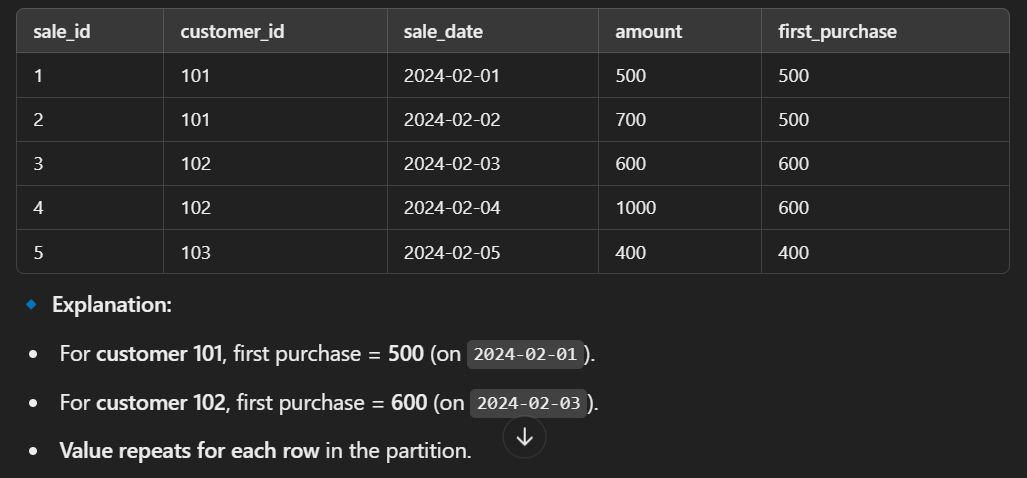

✔ Use Case – Find the highest salary in each department.

In [ ]:
# Write query to display the most expensive product under each category (corresponding to each record)
select *,
first_value(product_name) over(partition by product_category order by price desc) as most_exp_product
from product;

### 4. LAST_VALUE() – Last Row in Partition

- Retrieves the last value in an ordered partition.

By default, `LAST_VALUE()` considers only the current row as "last," so we must specify the frame to get the actual last value.

**Syntax:** `LAST_VALUE(column_name) OVER (PARTITION BY column_name ORDER BY column_name ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING)`

In [ ]:
SELECT sale_id, customer_id, sale_date, amount,
       LAST_VALUE(amount) OVER (PARTITION BY customer_id ORDER BY sale_date 
       ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS last_purchase
FROM sales;


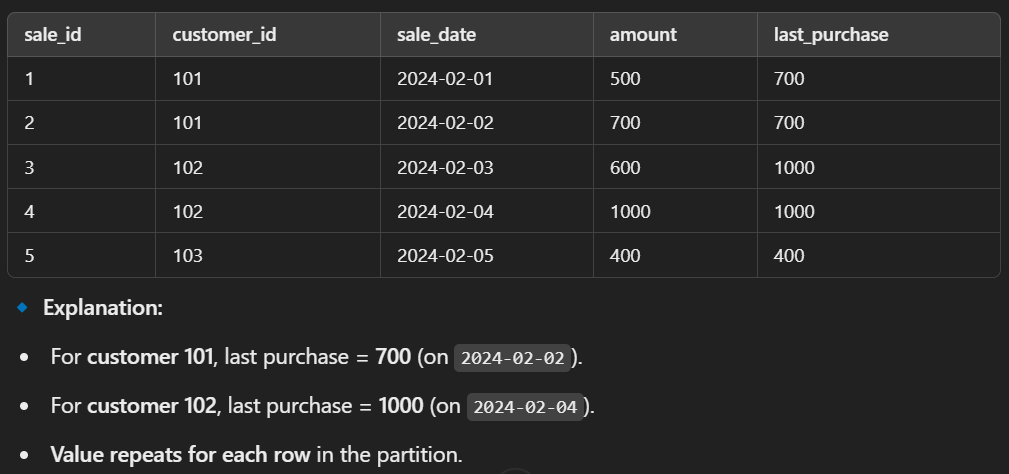

✔ Use Case – Find the lowest salary in each department.

In [ ]:

select *,
first_value(product_name)
    over(partition by product_category order by price desc) 
    as most_exp_product,
last_value(product_name)
    over(partition by product_category order by price desc range between unbounded preceeding and unbounded following) 
    as least_exp_product,
from product;

# default frame is: range between unbounded preceeding and current row

In [ ]:
# Advanced Use Case: First vs Last Purchase Difference

SELECT customer_id, 
       FIRST_VALUE(amount) OVER (PARTITION BY customer_id ORDER BY sale_date) AS first_purchase,
       LAST_VALUE(amount) OVER (PARTITION BY customer_id ORDER BY sale_date 
       ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS last_purchase,
       LAST_VALUE(amount) OVER (PARTITION BY customer_id ORDER BY sale_date 
       ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) - 
       FIRST_VALUE(amount) OVER (PARTITION BY customer_id ORDER BY sale_date) AS purchase_difference
FROM sales
GROUP BY customer_id, sale_date, amount;

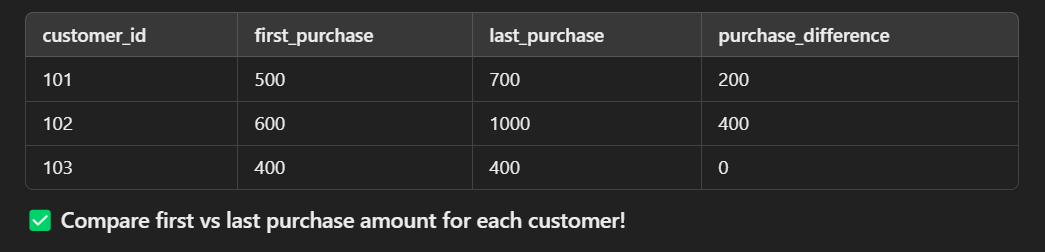

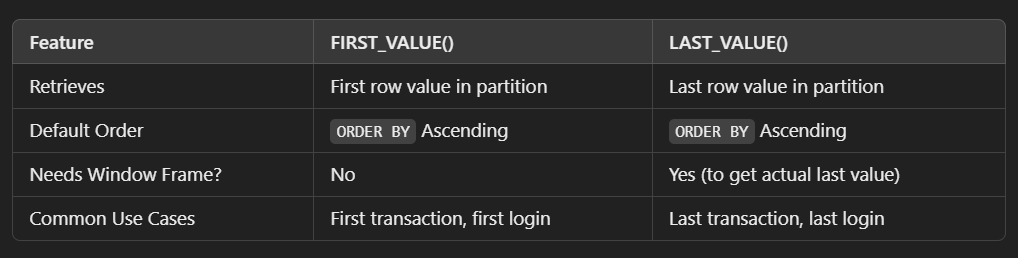

A `window frame` in SQL defines the subset of rows within a partition that is used to compute a window function's result for the current row.

### 5. NTH_VALUE() 
The NTH_VALUE() function is a window function that returns the N-th value of a column in an ordered result set within a window frame.

**📌 Key Features of NTH_VALUE()**
- ✅ Extracts the N-th value (e.g., 2nd, 3rd, etc.) from an ordered set.
- ✅ Works within a partition (like per department, per customer, etc.).
- ✅ Requires a defined window frame to control row visibility.

**Syntax:** <code>NTH_VALUE(column_name, N) OVER (
    PARTITION BY column_name 
    ORDER BY column_name 
    ROWS BETWEEN frame_start AND frame_end
)</code>

- column_name → The column from which the N-th value is extracted.
- N → The position (1st, 2nd, 3rd, etc.) in the ordered result.
- PARTITION BY → (Optional) Divides the dataset into groups.
- ORDER BY → Defines the sequence of rows.
- ROWS BETWEEN → Defines the visibility of rows in the frame.

In [ ]:
# Getting the 2nd Sale Amount

SELECT sale_id, customer_id, sale_date, amount,
       NTH_VALUE(amount, 2) OVER (ORDER BY sale_date ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS second_sale
FROM sales;

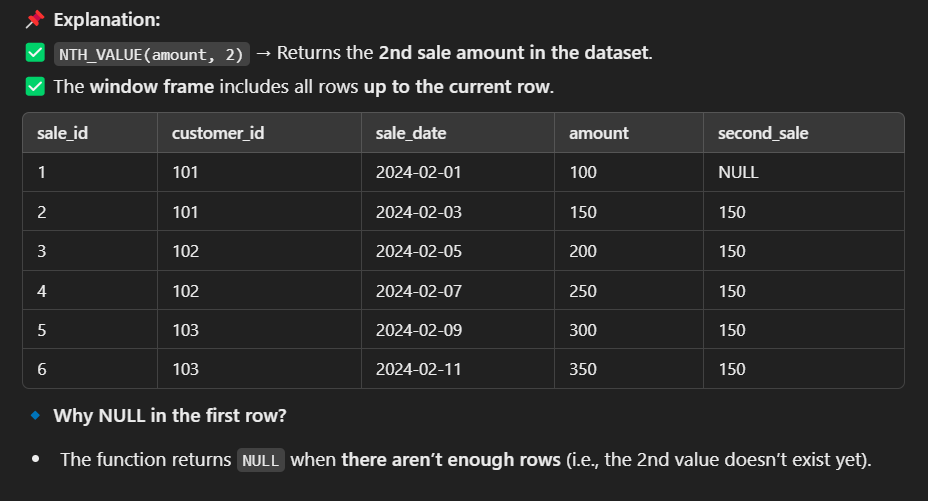



In [ ]:
# 2nd Sale Per Customer

SELECT sale_id, customer_id, sale_date, amount,
       NTH_VALUE(amount, 2) OVER (PARTITION BY customer_id ORDER BY sale_date ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS second_sale
FROM sales;

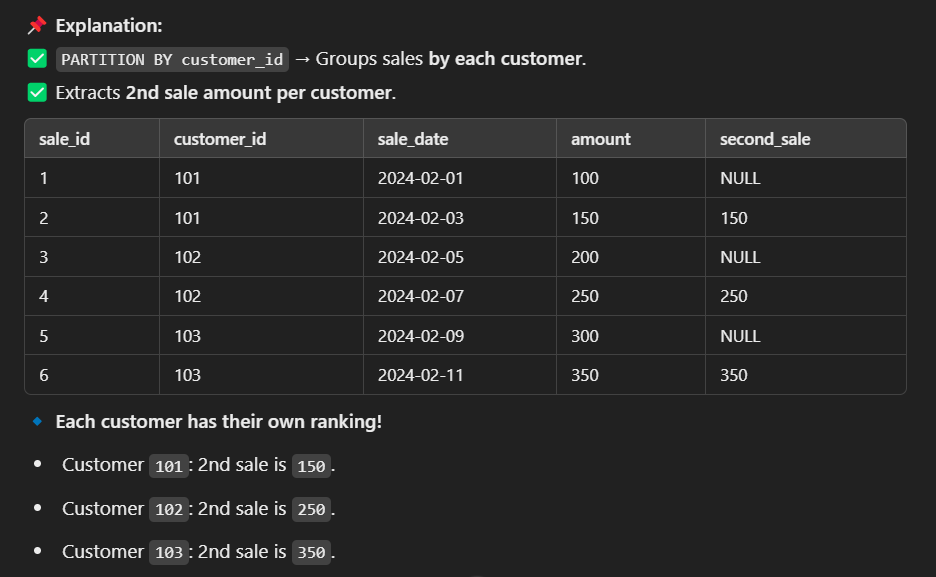

In [ ]:
# Extracting 3rd Sale Per Customer (Advanced Use Case)

SELECT sale_id, customer_id, sale_date, amount,
       NTH_VALUE(amount, 3) OVER (PARTITION BY customer_id ORDER BY sale_date ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS third_sale
FROM sales;

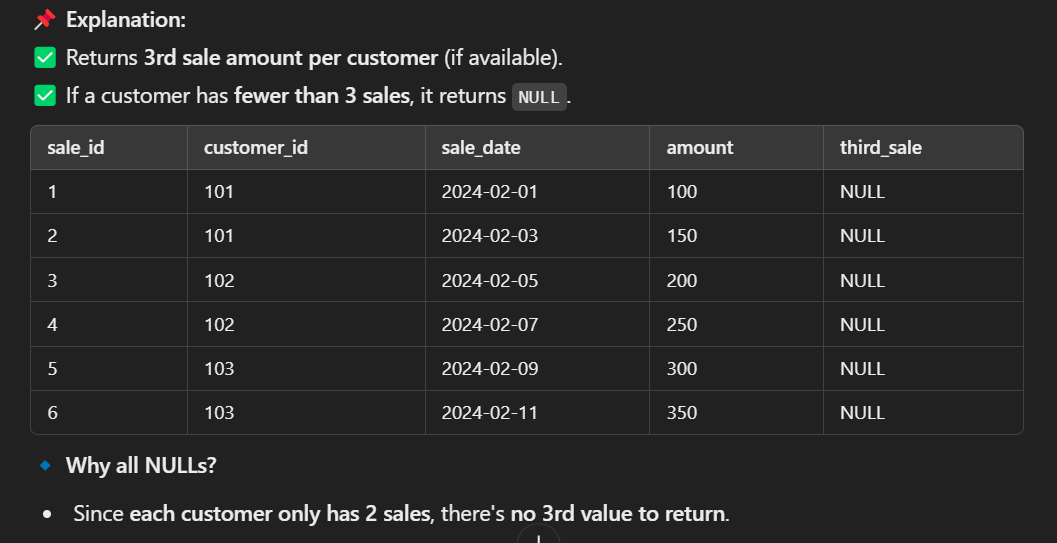

In [ ]:
# Comparing with FIRST_VALUE() and LAST_VALUE()

SELECT sale_id, customer_id, sale_date, amount,
       FIRST_VALUE(amount) OVER (PARTITION BY customer_id ORDER BY sale_date) AS first_sale,
       LAST_VALUE(amount) OVER (PARTITION BY customer_id ORDER BY sale_date ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS last_sale,
       NTH_VALUE(amount, 2) OVER (PARTITION BY customer_id ORDER BY sale_date) AS second_sale
FROM sales;

**📌 Explanation:**

- FIRST_VALUE(amount) → Gets first sale per customer.
- LAST_VALUE(amount) → Gets last sale per customer.
- NTH_VALUE(amount, 2) → Gets 2nd sale per customer.

<br>

- ✅ NTH_VALUE() extracts the N-th value from an ordered set.
- ✅ Requires a window frame (without ROWS BETWEEN, it can produce incorrect results).
- ✅ Unlike FIRST_VALUE() and LAST_VALUE(), it doesn’t always return a value (if N-th row doesn’t exist, it returns NULL).

**✅ Use cases:**

- Finding 2nd highest salary per department.
- Finding 2nd best-selling product per category.
- Extracting N-th transaction per customer.

In [ ]:
# Write query to display the Second most expensive product under each category.
select *,
    first_value (product_name) over w as most_exp_product,
    last_value (product_name) over w as least_exp_product,
    nth_value (product_name, over over w as second_most_exp_product
from product
window w as (partition by product_category order by price desc
range between unbounded preceding and unbounded following);

## Window Frame in SQL

A window frame in SQL defines the subset of rows within a partition that is used to compute a window function's result for the current row.

🚀 Think of it as a sliding window over data! It specifies:

- How many rows to include/exclude for calculations.
- Whether to consider preceding or following rows.
- Whether to use fixed or dynamic row ranges.


**📌 Why is the Window Frame Important?**
Without specifying a window frame, SQL applies default rules, which can cause unexpected behavior in functions like `LAST_VALUE()`.

✅ It helps control the scope of calculations in running totals, moving averages, ranking, and trend analysis.

**Syntax:** <code>window_function() OVER (
    PARTITION BY column_name 
    ORDER BY column_name 
    <frame_clause>
)</code>

**Frame Clause Options:** `ROWS | RANGE BETWEEN <frame_start> AND <frame_end>`

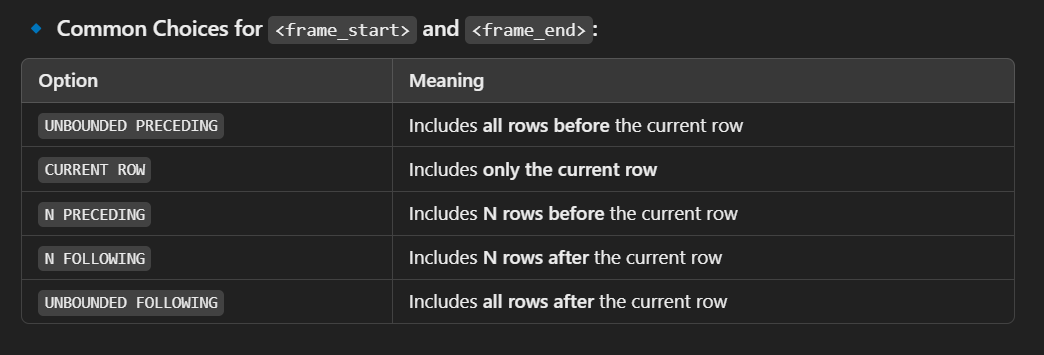

### 📌 Default Window Frame Behavior

In [ ]:
SELECT sale_id, customer_id, sale_date, amount,
       FIRST_VALUE(amount) OVER (PARTITION BY customer_id ORDER BY sale_date) AS first_sale
FROM sales;


# Default Frame:
ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW


**Issue:** The function considers only rows up to the current row, not the whole partition.

**Solution:** Use ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING to get the actual first or last value.

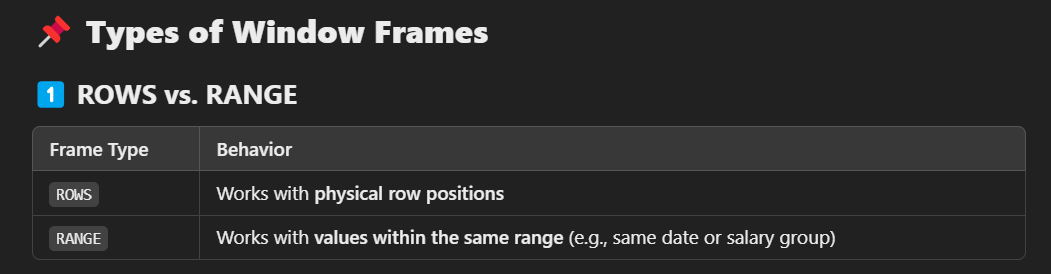

**Example:**
- `ROWS BETWEEN 3 PRECEDING AND 1 FOLLOWING` - Includes 3 rows before + current row + 1 row after.
- `RANGE BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW` - Includes all rows with the same ordering value (e.g., same salary).

In [ ]:
# running total wth rows

SELECT sale_id, customer_id, sale_date, amount,
       SUM(amount) OVER (PARTITION BY customer_id ORDER BY sale_date 
       ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS running_total
FROM sales;


**Explanation:** Computes cumulative sum from the first row up to the current row.

In [ ]:
# Moving Average with ROWS

SELECT sale_id, customer_id, sale_date, amount,
       AVG(amount) OVER (PARTITION BY customer_id ORDER BY sale_date 
       ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS moving_avg
FROM sales;

**Explanation:** Computes average of the current row and 2 previous rows.

In [ ]:
# LAST_VALUE() Fix using Window Frame

SELECT sale_id, customer_id, sale_date, amount,
       LAST_VALUE(amount) OVER (PARTITION BY customer_id ORDER BY sale_date 
       ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS last_purchase
FROM sales;


Fixes the issue of LAST_VALUE() returning the current row's value instead of the actual last row's value.

- ✅ ROWS → Works with physical row positions.
- ✅ RANGE → Works with values (e.g., same salary, date, etc.).

## Alternate way to write window function

In [ ]:
select *,
first_value (product_name)
    over (partition by product_category order by price desc)
    as most_exp_product,
last_value (product_name)
    over (partition by product_category order by price desc
    range between unbounded preceding and unbounded following)
    as least_exp_product
from product;

In [ ]:
# Alternate way to write SQL query using Window functions

select *,
first_value(product_name) over w as most_exp_product,
last_value(product_name) over w as least_exp_product
from product
window w as (partition by product_category order by price desc
    range between unbounded preceding and unbounded following);

## Understanding ROWS BETWEEN in SQL Window Functions

ROWS BETWEEN is a window frame specification that defines the range of rows considered for a window function relative to the current row.

**Syntax:** <code>window_function() OVER (
    PARTITION BY column_name 
    ORDER BY column_name 
    ROWS BETWEEN frame_start AND frame_end
)</code>

- frame_start and frame_end specify the range.
- The frame moves dynamically as SQL processes each row.

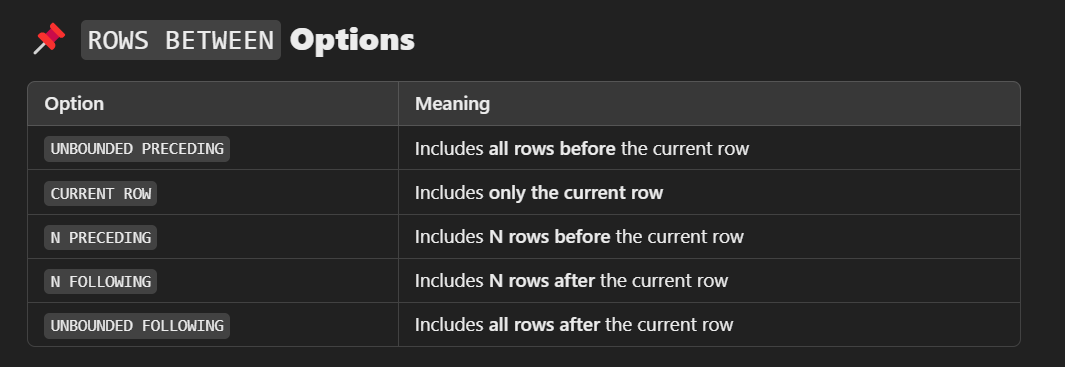

In [ ]:
SELECT sale_id, sale_date, amount,
       SUM(amount) OVER (ORDER BY sale_date ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS running_total
FROM sales;


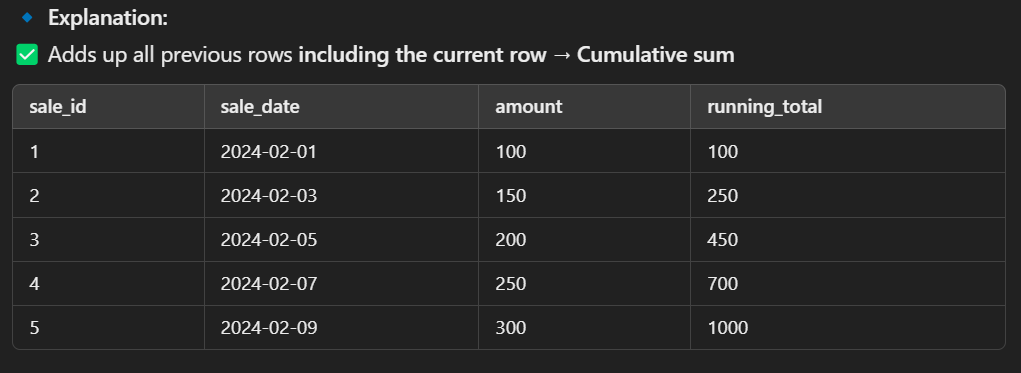

In [ ]:
SELECT sale_id, sale_date, amount,
       AVG(amount) OVER (ORDER BY sale_date ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS moving_avg
FROM sales;


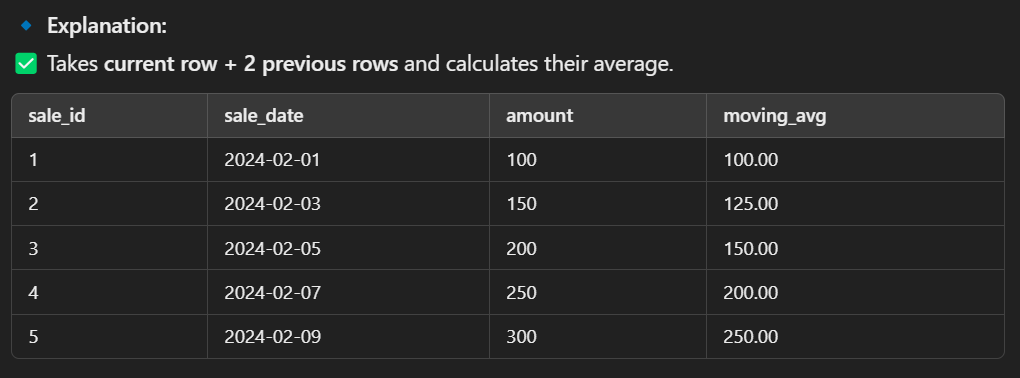

In [ ]:
SELECT sale_id, sale_date, amount,
       AVG(amount) OVER (ORDER BY sale_date ROWS BETWEEN 1 PRECEDING AND 1 FOLLOWING) AS centered_avg
FROM sales;


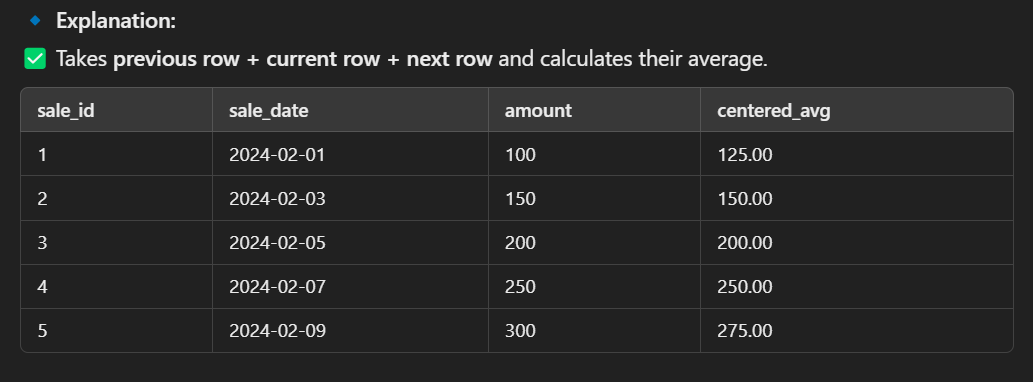

In [ ]:
SELECT sale_id, sale_date, amount,
       SUM(amount) OVER (ORDER BY sale_date ROWS BETWEEN CURRENT ROW AND UNBOUNDED FOLLOWING) AS future_cumulative
FROM sales;


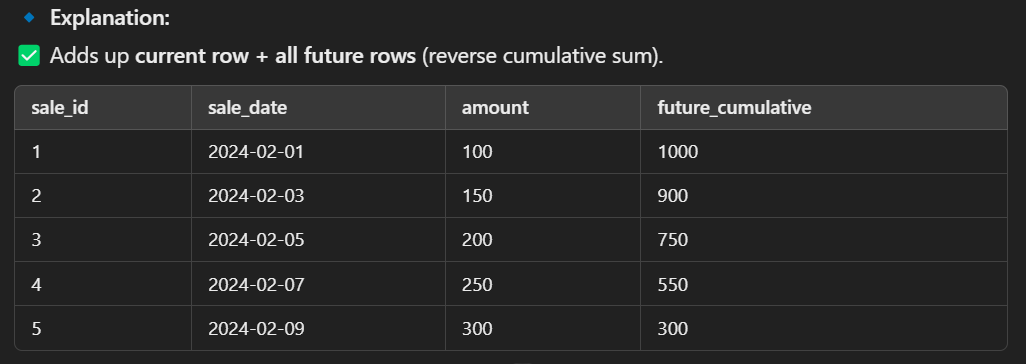

**Common Uses:**

- Running Total → `ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW`
- Moving Average → `ROWS BETWEEN N PRECEDING AND CURRENT ROW`
- Centered Moving Average → `ROWS BETWEEN N PRECEDING AND N FOLLOWING`
- Future Cumulative Sum → `ROWS BETWEEN CURRENT ROW AND UNBOUNDED FOLLOWING`

## Understanding RANGE BETWEEN in SQL Window Functions

RANGE BETWEEN is a window frame specification used in window functions. It defines a range of rows based on values rather than physical row positions.

**Syntax:** <code>window_function() OVER (
    PARTITION BY column_name 
    ORDER BY column_name 
    RANGE BETWEEN frame_start AND frame_end
)</code>

- frame_start and frame_end define the range.
- The range is dynamic and depends on column values, not row positions.

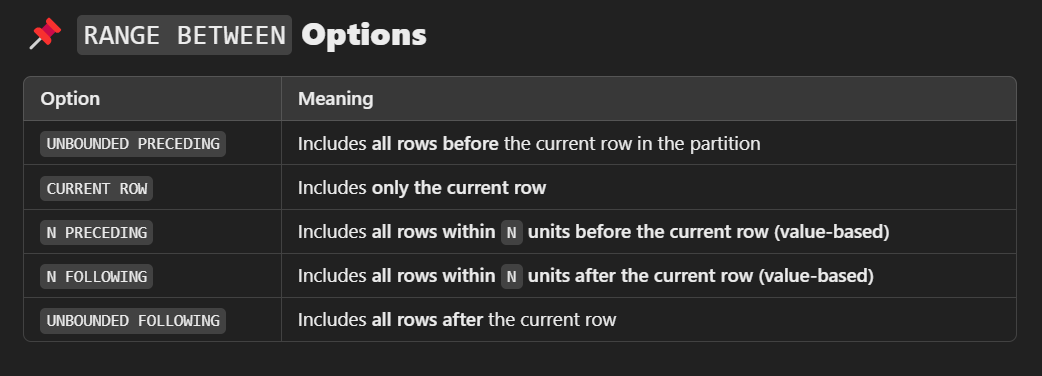

In [ ]:
SELECT sale_id, sale_date, amount,
       SUM(amount) OVER (ORDER BY sale_date RANGE BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS running_total
FROM sales;


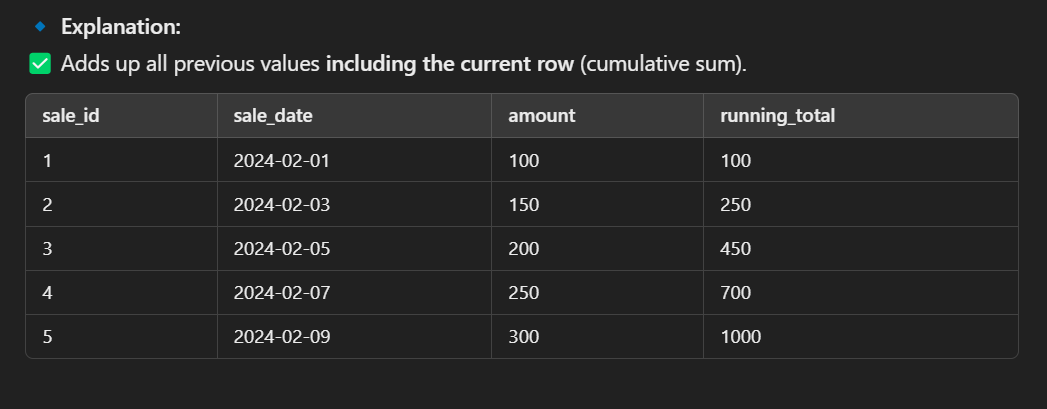

In [ ]:
SELECT sale_id, sale_date, amount,
       SUM(amount) OVER (ORDER BY sale_date RANGE BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS total_sales
FROM sales;


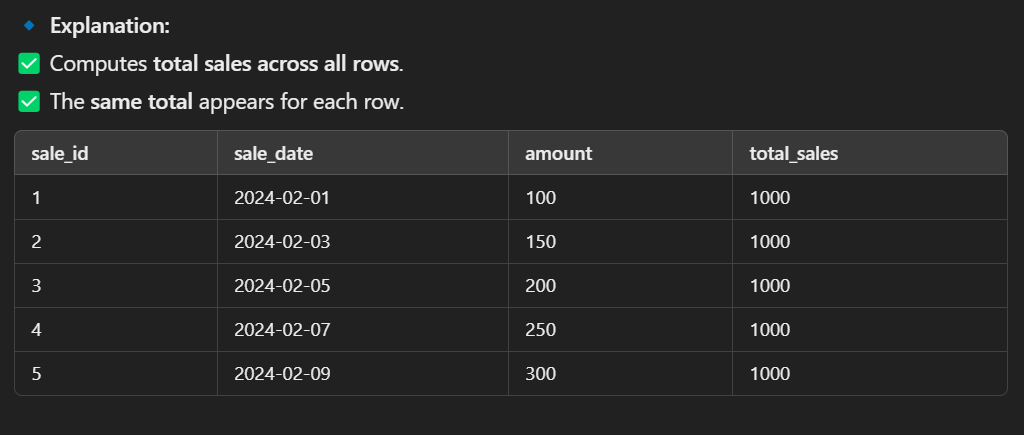

In [ ]:
SELECT sale_id, sale_date, amount,
       SUM(amount) OVER (ORDER BY sale_date RANGE BETWEEN INTERVAL '3' DAY PRECEDING AND CURRENT ROW) AS moving_sum
FROM sales;


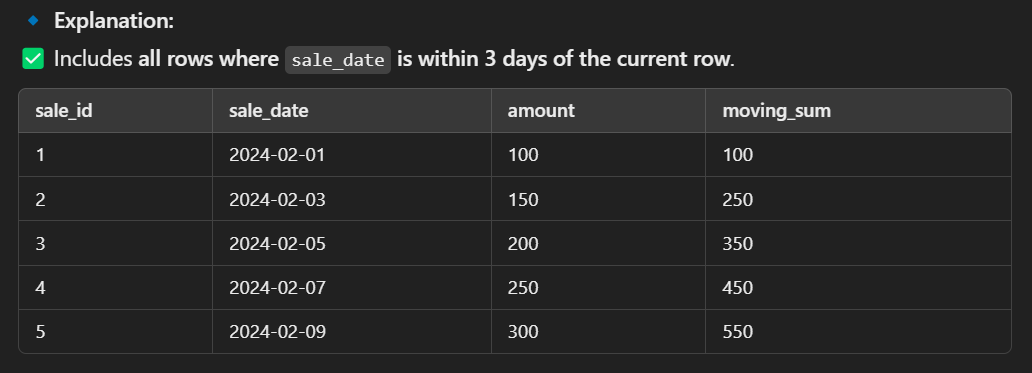

In [ ]:
SELECT sale_id, sale_date, amount,
       AVG(amount) OVER (ORDER BY sale_date RANGE BETWEEN INTERVAL '5' DAY PRECEDING AND CURRENT ROW) AS moving_avg
FROM sales;


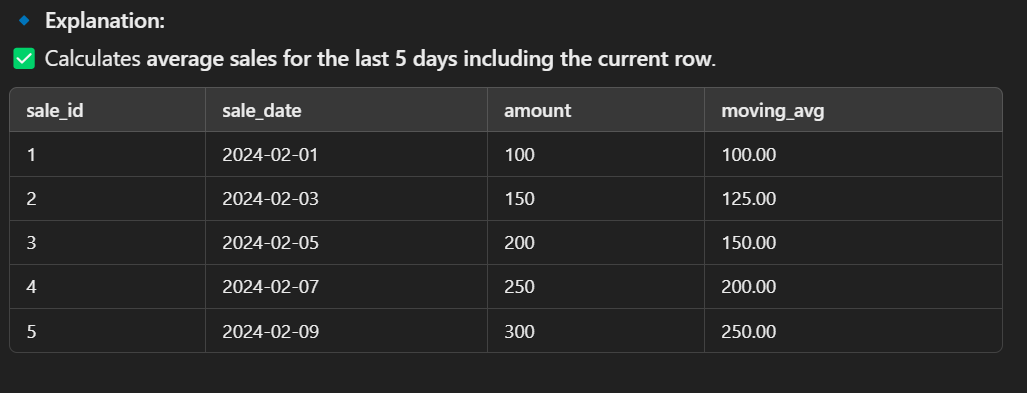




**When to Use RANGE BETWEEN?**- 
- ✅ When you need to aggregate values based on a range of values (e.g., date ranges, price ranges).
- ✅ When you have duplicate values in the ORDER BY column (e.g., multiple sales on the same date).
- ✅ When you want value-based calculations (e.g., moving averages over time).


**Common Use Cases:**

- Running Totals → `RANGE BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW`
- Moving Averages → `RANGE BETWEEN INTERVAL 'N' DAY PRECEDING AND CURRENT ROW`
- Total Sales for a Time Period → `RANGE BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING`

## Performance Optimization Tips
- ✅ Use PARTITION BY to Reduce Computation
- ✅ Use ROWS BETWEEN for Fixed Windows
- ✅ Use RANGE BETWEEN for Logical Grouping
- ✅ Avoid ORDER BY inside CTEs if Not Needed
- ✅ Test Performance with EXPLAIN ANALYZE

## CUME_DIST() Function in SQL

CUME_DIST() (Cumulative Distribution) is a window function that calculates the cumulative percentile rank of a row relative to the entire result set or partition.

**📌 Key Features of CUME_DIST()**
- ✅ Computes cumulative distribution (fraction of rows ≤ the current row).
- ✅ Returns a value between 0 and 1 (inclusive).
- ✅ Ranks rows continuously (no gaps like RANK()).
- ✅ Useful for percentile analysis, grading systems, and ranking records.

**Syntax:** <code>CUME_DIST() OVER (
    PARTITION BY column_name 
    ORDER BY column_name
)</code>

- PARTITION BY → (Optional) Groups data into partitions (e.g., per department, per city).
- ORDER BY → Defines ranking order (e.g., by salary, scores, sales, etc.).

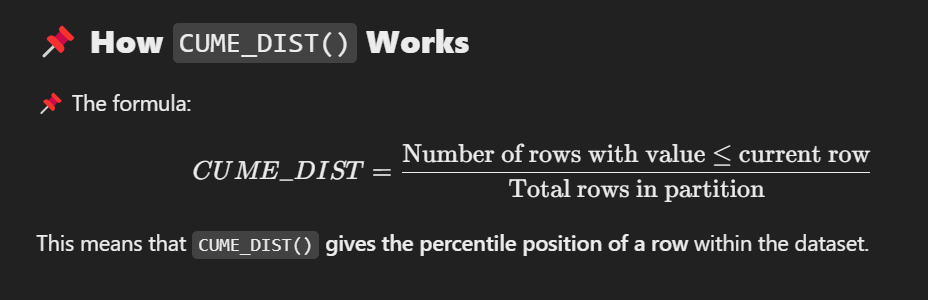

In [ ]:
# Cumulative Distribution of Salaries

SELECT emp_id, emp_name, salary,
       CUME_DIST() OVER (ORDER BY salary) AS cum_dist
FROM employees;


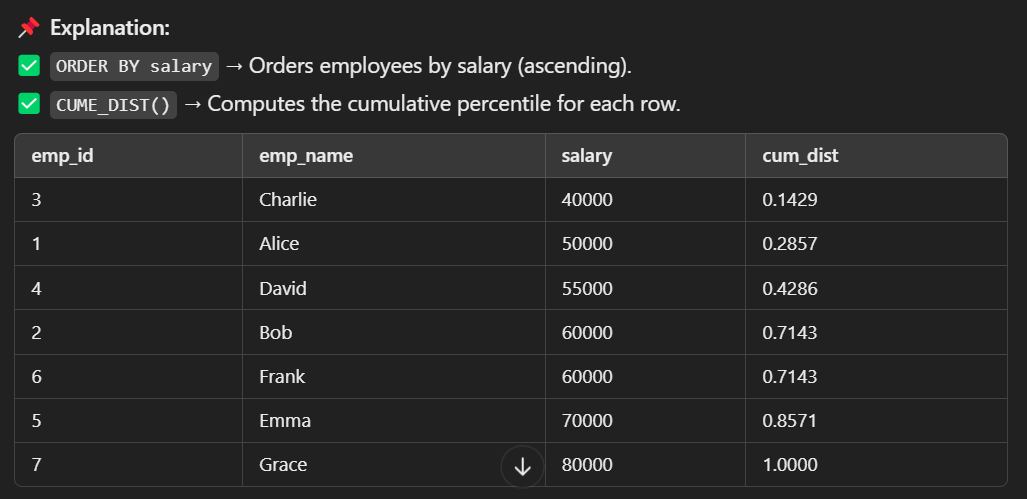

**Why does 60000 have 0.7143?**

- CUME_DIST() counts all rows ≤ current row (including ties).
- There are 5 out of 7 employees with salary ≤ 60000.
- 5/7 = 0.7143.

Last row always has 1.0000 because it includes all records.



In [ ]:
#  Cumulative Distribution per Department

SELECT emp_id, emp_name, department, salary,
       CUME_DIST() OVER (PARTITION BY department ORDER BY salary) AS cum_dist
FROM employees;

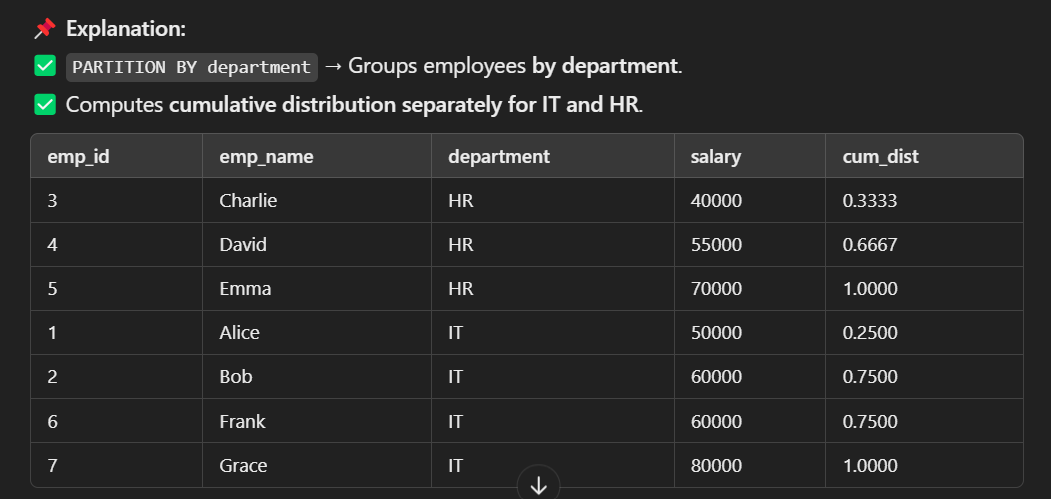

**🔹 HR Department:**

- 40000 → 1/3 = 0.3333
- 55000 → 2/3 = 0.6667
- 70000 → 3/3 = 1.0000

**🔹 IT Department:**- 

- 50000 → 1/4 = 0.2500
- 60000 → 3/4 = 0.7500 (includes both 60000 rows).
- 80000 → 4/4 = 1.0000.

In [ ]:
# Filtering Employees in Top 80% Salary Bracket

SELECT emp_id, emp_name, salary
FROM (
    SELECT emp_id, emp_name, salary,
           CUME_DIST() OVER (ORDER BY salary DESC) AS cum_dist
    FROM employees
) ranked
WHERE cum_dist <= 0.80;

**📌 Explanation:**
- ✅ ORDER BY salary DESC → Highest salary first.
- ✅ Computes cumulative distribution from highest salary.
- ✅ Filters top 80% salary earners.

In [ ]:
# Comparing CUME_DIST() with PERCENT_RANK()

SELECT emp_id, emp_name, salary,
       CUME_DIST() OVER (ORDER BY salary) AS cum_dist,
       PERCENT_RANK() OVER (ORDER BY salary) AS percent_rank
FROM employees;

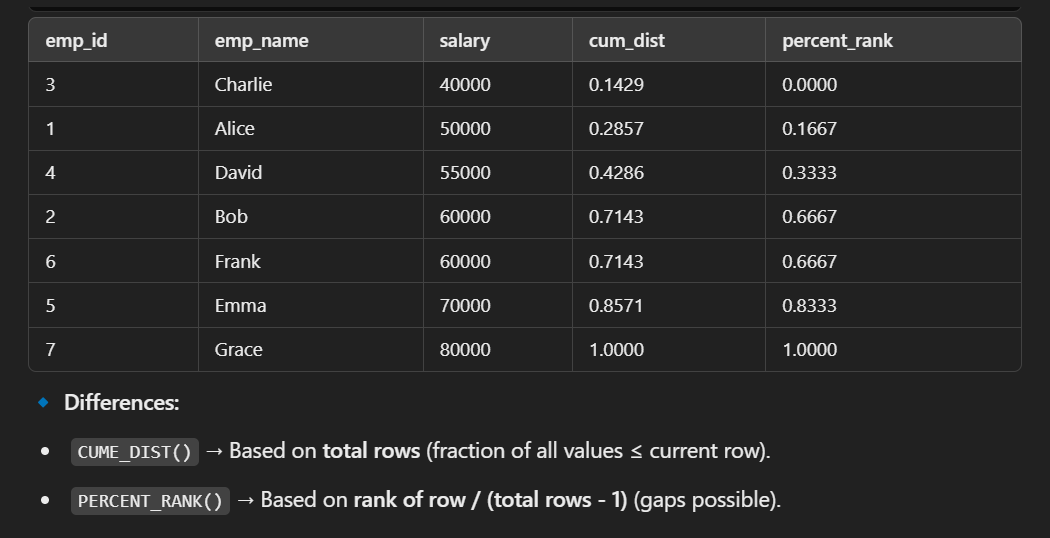

- ✅ CUME_DIST() computes cumulative percent ranking (fraction of rows ≤ current).
- ✅ Always returns values between 0 and 1.
- ✅ No gaps in ranking (unlike RANK() or DENSE_RANK()).
- ✅ Useful for percentile-based filtering (e.g., top 80% salaries, student performance).
- ✅ Different from PERCENT_RANK() (which considers row index).

In [ ]:
select *,
cume_dist() over (order by price desc) as cume_distribution
round (cume_dist() over (order by price desc) ::numeric * 100, 2)
as cume_dist_percentage
from product;

In [ ]:
# Query to fetch all products which are constituting the first 30%
# of the data in products table based on price.

select product_name, (cume_dist_percentage || '%') as cume_dist_percentage
from (
select *,
cume_dist() over (order by price desc) as cume_distribution ,
round(cume_dist) over (order by price desc):: numeric * 100, 2) as cume_dist_percentage
from product) x
where x.cume_dist_percentage <= 30;

## PERCENT_RANK() Function in SQL

PERCENT_RANK() is a window function that calculates the relative rank of a row as a percentage of the total rows in a result set or partition.

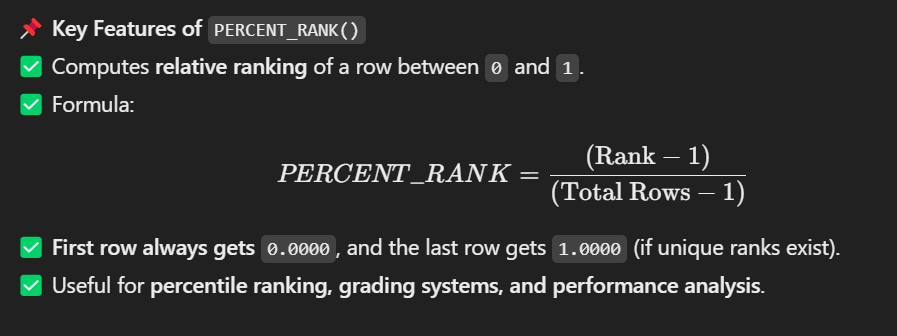

**Syntax:** <code>PERCENT_RANK() OVER (
    PARTITION BY column_name 
    ORDER BY column_name
)</code>

- PARTITION BY → (Optional) Groups data into partitions (e.g., per department).
- ORDER BY → Defines ranking order (e.g., by salary, sales, scores, etc.).

In [ ]:
# Percent Rank of Employees Based on Salary

SELECT emp_id, emp_name, salary,
       PERCENT_RANK() OVER (ORDER BY salary) AS percent_rank
FROM employees;

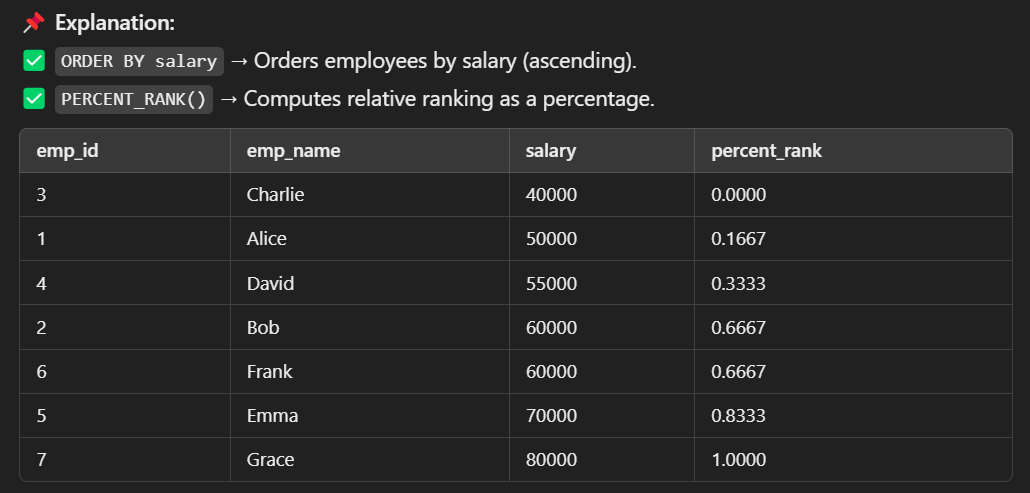

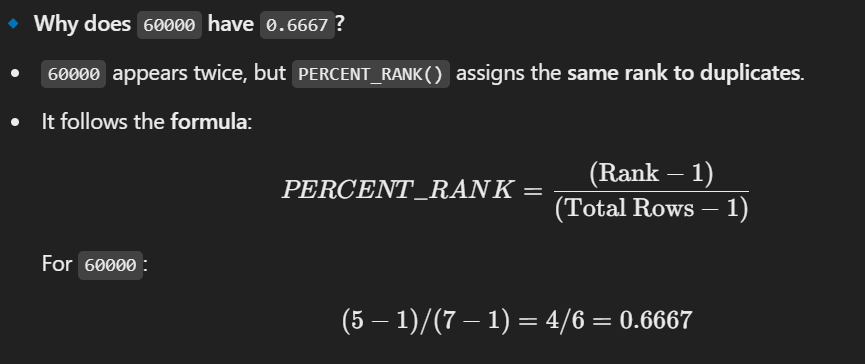



In [ ]:
# Percent Rank per Department

SELECT emp_id, emp_name, department, salary,
       PERCENT_RANK() OVER (PARTITION BY department ORDER BY salary) AS percent_rank
FROM employees;

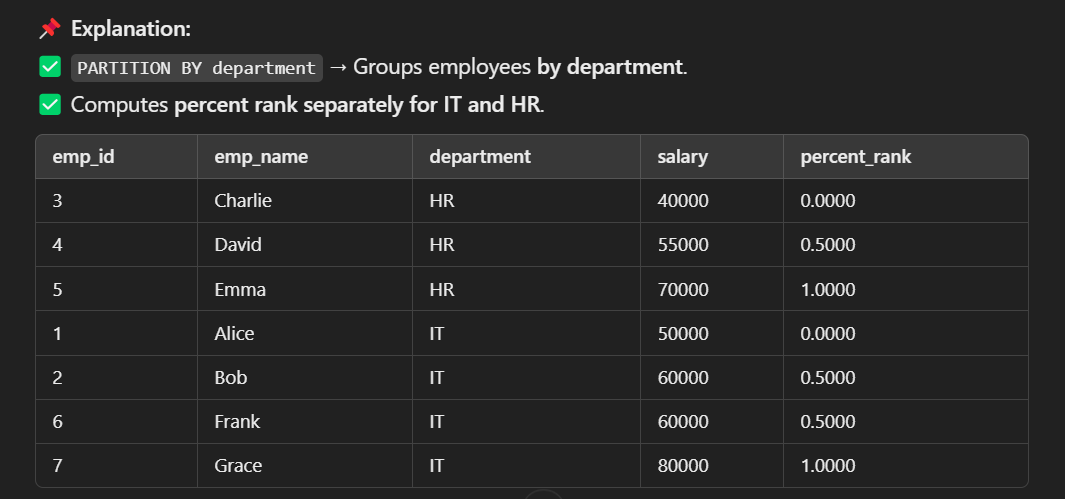

**🔹 HR Department:**

- 40000 → (1-1) / (3-1) = 0.0000
- 55000 → (2-1) / (3-1) = 0.5000
- 70000 → (3-1) / (3-1) = 1.0000

**🔹 IT Department:**

- 50000 → (1-1) / (4-1) = 0.0000
- 60000 → (3-1) / (4-1) = 0.5000
- 80000 → (4-1) / (4-1) = 1.0000

In [ ]:
# Finding Employees in the Top 20% Salary Bracket

SELECT emp_id, emp_name, salary
FROM (
    SELECT emp_id, emp_name, salary,
           PERCENT_RANK() OVER (ORDER BY salary DESC) AS percent_rank
    FROM employees
) ranked
WHERE percent_rank <= 0.20;

**📌 Explanation:**
- ✅ ORDER BY salary DESC → Highest salary first.
- ✅ Computes percent rank from highest salary.
- ✅ Filters top 20% salary earners.

In [ ]:
# Comparing PERCENT_RANK() with CUME_DIST()

SELECT emp_id, emp_name, salary,
       PERCENT_RANK() OVER (ORDER BY salary) AS percent_rank,
       CUME_DIST() OVER (ORDER BY salary) AS cum_dist
FROM employees;

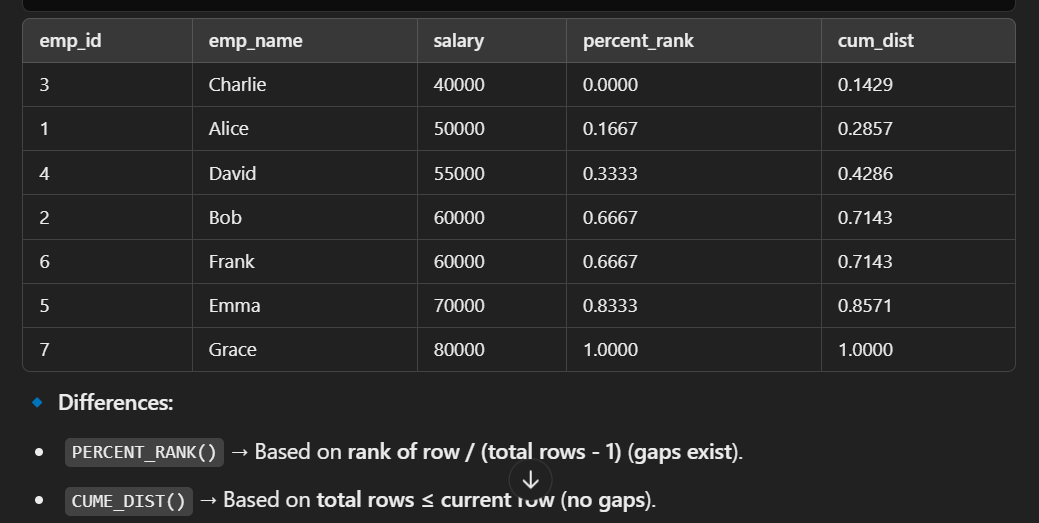

- ✅ PERCENT_RANK() calculates the relative rank of a row as a percentage.
- ✅ First row always gets 0.0000, and the last row gets 1.0000.
- ✅ Handles duplicates by assigning the same rank.
- ✅ Different from CUME_DIST(), which considers all rows ≤ current row.
- ✅ Useful for percentile ranking, grading, and performance analysis.

In [ ]:
select *,
percent_rank() over(order by price) as percentage_rank,
round(percent_rank() over order by price):: numeric * 100, 2) as per_rank
from product;

In [ ]:
# Query to identify how much percentage more expensive is "Galaxy Z Fold 3" when compared to all products

select product_name, per_rank
from (
    select *,
    percent_rank() over(order by price) as percentage_rank,
    round (percent_rank() over(order by price):: numeric * 100, 2) as per_rank
    from product) x
where x.product_name = 'Galaxy Z Fold 3';

# Normalization
Normalization is the process of organizing data in a database to reduce redundancy and improve data integrity. It involves dividing large tables into smaller, more related tables and defining relationships between them. The goal of normalization is to eliminate anomalies (insertion, update, and deletion anomalies) and ensure data consistency.

**Benefits:**
1. Reduces Data Redundancy: Prevents the same data from being stored in multiple places.
2. Improves Data Integrity: Ensures that data is consistent across the database.
3. Efficient Updates: Changes to data are easier since there is no duplication of data.
4. Faster Queries: Smaller, more specific tables can speed up query performance

**Drawbacks:**
- Complex Queries: More joins might be required, making queries more complex.
- Performance Impact: Excessive normalization might lead to performance degradation in certain cases, especially when dealing with large datasets

## 1NF
- The table must have a primary key (a unique identifier for each row).
- All attributes (columns) must contain atomic values (indivisible values).
- Each column should contain values of a single type (no repeating groups or arrays).

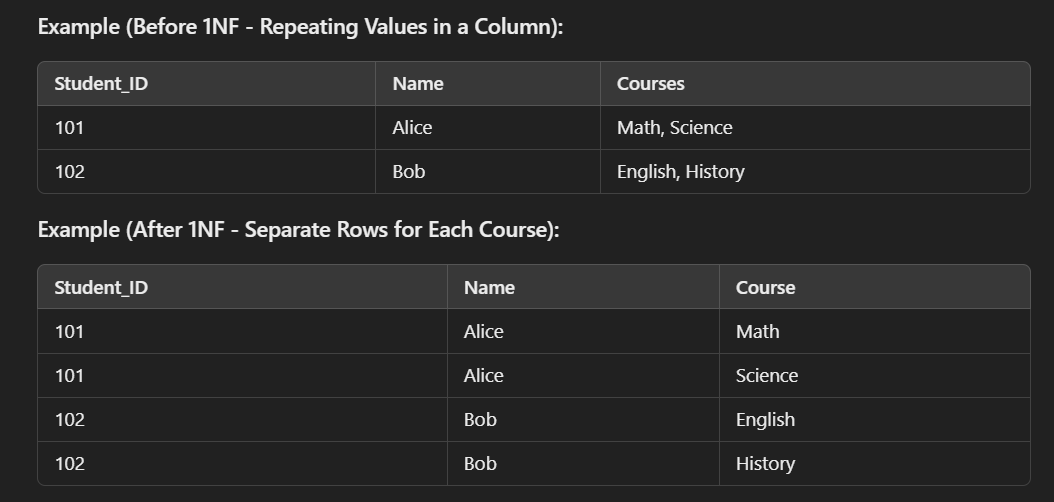

Consider a student enrollment table where a student can enroll in multiple courses, stored in a single column:

In [ ]:
CREATE TABLE Student (
    Student_ID INT PRIMARY KEY,
    Name VARCHAR(50),
    Courses VARCHAR(100)  -- Multiple values in one column (bad design)
);


# We separate courses into multiple rows to follow 1NF rules:
CREATE TABLE Student_Courses (
    Student_ID INT,
    Name VARCHAR(50),
    Course VARCHAR(50),
    PRIMARY KEY (Student_ID, Course)
);

# ✅ Now, each column contains atomic values and there are no repeating groups.

## 2NF
- The table must be in 1NF.
- No partial dependency (a non-key attribute must depend on the whole primary key, not just part of it).

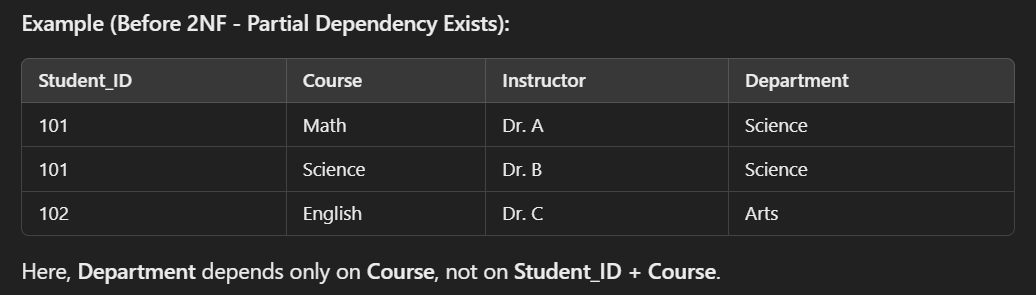

In [ ]:
# Example (After 2NF - Splitting into Two Tables):

Student_Courses Table
| Student_ID | Course | Instructor |
|------------|---------|------------|
| 101 | Math | Dr. A |
| 101 | Science | Dr. B |
| 102 | English | Dr. C |

    
Course_Department Table
| Course | Department |
|-----------|-----------|
| Math | Science |
| Science | Science |
| English | Arts |

Let's assume we store instructors and their departments in the Student_Courses table:

In [ ]:
CREATE TABLE Student_Courses (
    Student_ID INT,
    Course VARCHAR(50),
    Instructor VARCHAR(50),
    Department VARCHAR(50),
    PRIMARY KEY (Student_ID, Course)
);


# Issue:
    # Department depends only on Course, not on (Student_ID, Course).
    # This is a partial dependency, which violates 2NF.

# We separate department details into another table:
CREATE TABLE Student_Courses (
    Student_ID INT,
    Course VARCHAR(50),
    Instructor VARCHAR(50),
    PRIMARY KEY (Student_ID, Course)
);

CREATE TABLE Course_Department (
    Course VARCHAR(50) PRIMARY KEY,
    Department VARCHAR(50)
);

# ✅ Now, there are no partial dependencies.

## 3NF
- The table must be in 2NF.
- No transitive dependency (A non-key attribute should not depend on another non-key attribute).

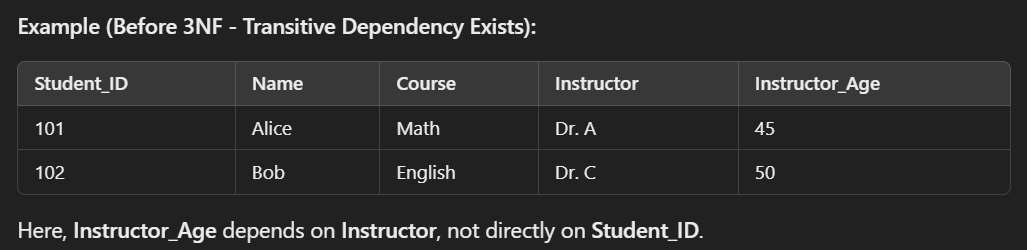

In [ ]:
# Example (After 3NF - Splitting into Separate Tables):

Student_Courses Table
| Student_ID | Name | Course | Instructor |
|------------|--------|---------|------------|
| 101 | Alice | Math | Dr. A |
| 102 | Bob | English | Dr. C |

    
Instructor Table
| Instructor | Instructor_Age |
|------------|---------------|
| Dr. A | 45 |
| Dr. C | 50 |



Suppose the instructor’s age is stored in Student_Courses, but it depends on Instructor, not Student_ID or Course:

In [ ]:
CREATE TABLE Student_Courses (
    Student_ID INT,
    Course VARCHAR(50),
    Instructor VARCHAR(50),
    Instructor_Age INT,  -- Transitive dependency
    PRIMARY KEY (Student_ID, Course)
);


# Instructor details should be in a separate table:
CREATE TABLE Student_Courses (
    Student_ID INT,
    Course VARCHAR(50),
    Instructor VARCHAR(50),
    PRIMARY KEY (Student_ID, Course)
);

CREATE TABLE Instructor (
    Instructor VARCHAR(50) PRIMARY KEY,
    Instructor_Age INT
);

# ✅ Now, there are no transitive dependencies!

## BCNF
- The table must be in 3NF.
- Every determinant must be a candidate key (If any non-trivial functional dependency exists, the determinant must be a superkey).

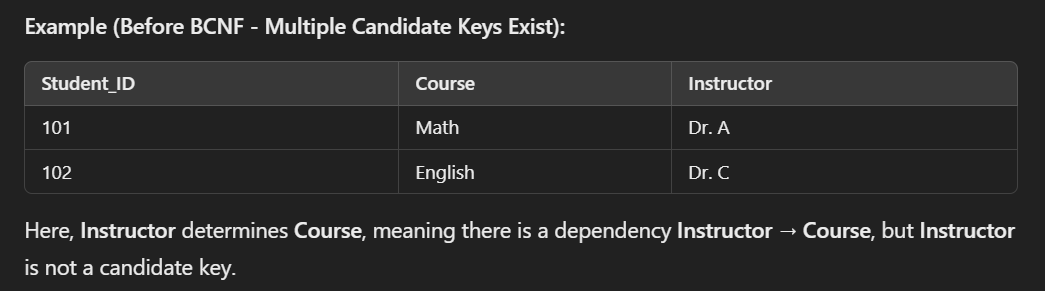

In [ ]:
# Example (After BCNF - Separate Tables for Dependency):

Student_Courses Table
| Student_ID | Course |
|------------|---------|
| 101 | Math |
| 102 | English |

    
Instructor_Course Table
| Instructor | Course |
|------------|---------|
| Dr. A | Math |
| Dr. C | English |



Suppose instructors can only teach one course, creating a functional dependency:

Instructor → Course (Instructor determines Course, but Instructor is not a candidate key).

In [ ]:
CREATE TABLE Student_Courses (
    Student_ID INT,
    Course VARCHAR(50),
    Instructor VARCHAR(50),
    PRIMARY KEY (Student_ID, Course)
);


# ince Instructor uniquely determines Course, we split tables:
CREATE TABLE Student_Courses (
    Student_ID INT,
    Course VARCHAR(50),
    PRIMARY KEY (Student_ID, Course)
);

CREATE TABLE Instructor_Course (
    Instructor VARCHAR(50) PRIMARY KEY,
    Course VARCHAR(50) UNIQUE
);

# ✅ Now, every determinant is a candidate key.

## 4NF
- The table must be in BCNF.
- No multivalued dependencies (A single key should not determine multiple independent attributes).

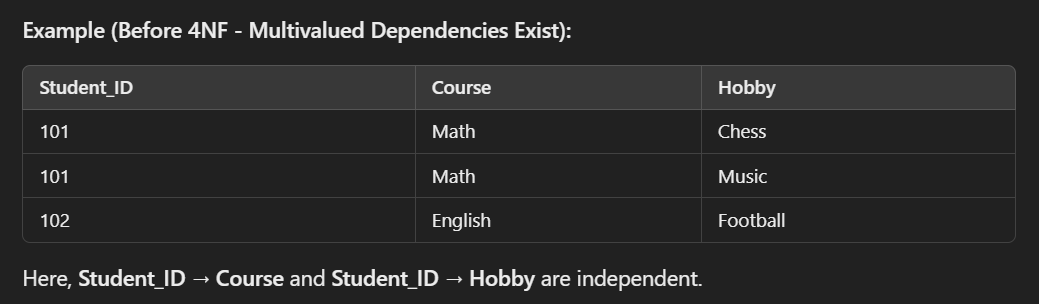

In [ ]:
# Example (After 4NF - Separate Tables for Multivalued Dependencies):

Student_Courses Table
| Student_ID | Course |
|------------|---------|
| 101 | Math |
| 102 | English |

    
Student_Hobbies Table
| Student_ID | Hobby |
|------------|--------|
| 101 | Chess |
| 101 | Music |
| 102 | Football |



A student may have multiple courses and multiple hobbies, leading to multivalued dependencies:

In [ ]:
CREATE TABLE Student (
    Student_ID INT PRIMARY KEY,
    Name VARCHAR(50),
    Course VARCHAR(50),
    Hobby VARCHAR(50)
);


# Issue:
    # Student → Course
    # Student → Hobby
    # These dependencies are independent, but stored in one table, violating 4NF.

CREATE TABLE Student_Courses (
    Student_ID INT,
    Course VARCHAR(50),
    PRIMARY KEY (Student_ID, Course)
);

CREATE TABLE Student_Hobbies (
    Student_ID INT,
    Hobby VARCHAR(50),
    PRIMARY KEY (Student_ID, Hobby)
);

# ✅ No more multivalued dependencies!

## 5NF
- It is in 4NF.
- It does not contain any join dependency, i.e., data can only be reconstructed using joins between smaller tables

# Keys

## Primary Key
A Primary Key (PK) uniquely identifies each record in a table. It cannot have duplicate or NULL values.

In [ ]:
CREATE TABLE Student (
    Student_ID INT PRIMARY KEY,
    Name VARCHAR(50),
    Age INT
);

# ✅ Student_ID is the primary key, ensuring each student has a unique identifier.

## Composite Key
A Composite Key consists of two or more columns that together uniquely identify a row.

In [ ]:
CREATE TABLE Student_Courses (
    Student_ID INT,
    Course_ID INT,
    Enrollment_Date DATE,
    PRIMARY KEY (Student_ID, Course_ID)
);

# ✅ Here, (Student_ID, Course_ID) together act as a composite primary key.

## Candidate Key
A Candidate Key is a set of one or more attributes that can uniquely identify a row. One candidate key is chosen as the primary key, while others remain as alternate keys.

In [ ]:
CREATE TABLE Employee (
    Employee_ID INT UNIQUE,
    Email VARCHAR(100) UNIQUE,
    Phone VARCHAR(15) UNIQUE,
    Name VARCHAR(50),
    PRIMARY KEY (Employee_ID)
);

# ✅ Candidate Keys: {Employee_ID, Email, Phone}
# ✅ Primary Key Chosen: Employee_ID
# ✅ Alternate Keys: Email and Phone

## Alternate Key
A Candidate Key that is not chosen as the Primary Key is called an Alternate Key.

## Foreign Key
A Foreign Key is a column that establishes a relationship between two tables. It references the Primary Key of another table.

In [ ]:
CREATE TABLE Courses (
    Course_ID INT PRIMARY KEY,
    Course_Name VARCHAR(100)
);

CREATE TABLE Student_Courses (
    Student_ID INT,
    Course_ID INT,
    Enrollment_Date DATE,
    PRIMARY KEY (Student_ID, Course_ID),
    FOREIGN KEY (Course_ID) REFERENCES Courses(Course_ID)
);

# ✅ Course_ID in Student_Courses is a foreign key referencing Course_ID in Courses.

## Super Key
A Super Key is any set of attributes that uniquely identifies a row. It can have extra attributes that are not necessary.

In the Employee Table, the following are Super Keys:
- {Employee_ID}
- {Employee_ID, Email}
- {Employee_ID, Email, Phone}

**🚀 Note:** Every Primary Key and Candidate Key is a Super Key, but not every Super Key is a Candidate Key.

## Unique Key
A Unique Key is similar to a Primary Key, but it can contain NULL values.

In [ ]:
CREATE TABLE Customers (
    Customer_ID INT PRIMARY KEY,
    Email VARCHAR(100) UNIQUE NOT NULL,
    Phone VARCHAR(15) UNIQUE
);

# ✅ Email is a Unique Key (cannot have duplicates).
# ✅ Phone is a Unique Key but can contain NULL.

##  Surrogate Key
A Surrogate Key is a system-generated unique identifier, usually an auto-increment column.

In [ ]:
CREATE TABLE Orders (
    Order_ID SERIAL PRIMARY KEY,
    Order_Date DATE
);

# ✅ Order_ID is a Surrogate Key (Auto-incremented ID).

# Types of SQL statements

## DDL (Data Definition Language)
DDL commands are used to define and modify the database structure, such as tables, schemas, indexes, etc.

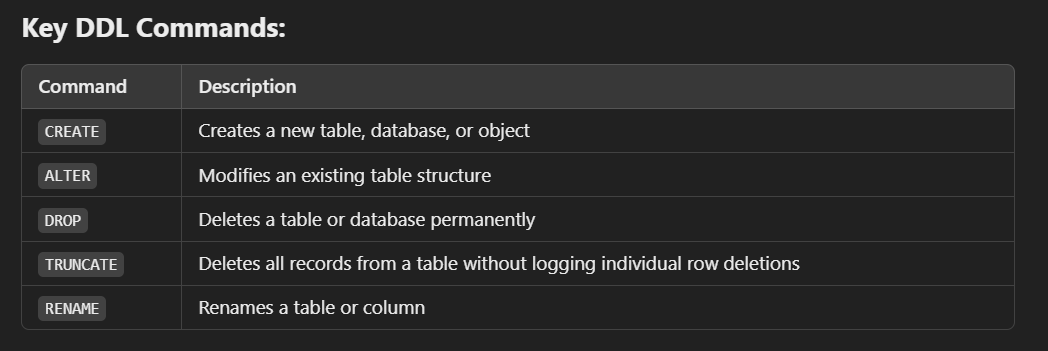

## DML (Data Manipulation Language)
DML commands are used to manipulate data stored in tables.

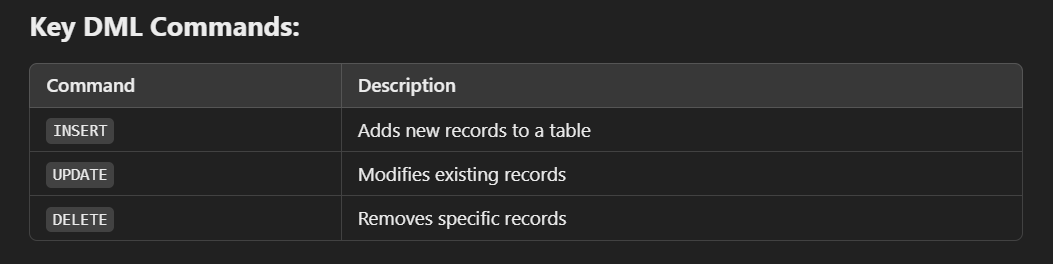

## DQL (Data Query Language)
DQL commands are used to fetch data from the database.

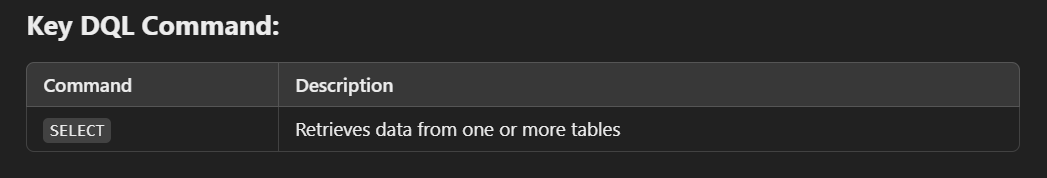

##  TCL (Transaction Control Language)
TCL commands are used to manage transactions in a database.

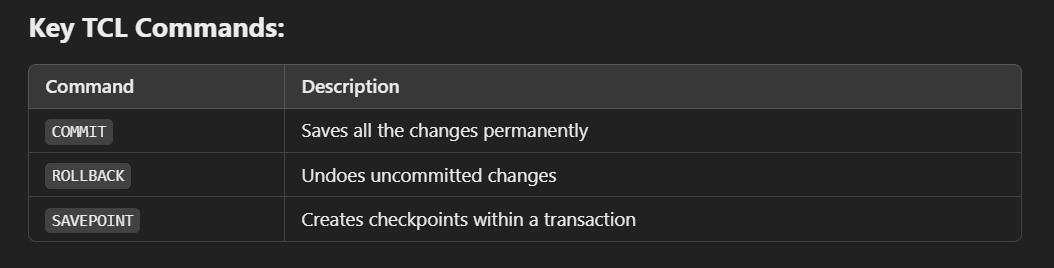

## DCL (Data Control Language)
DCL commands are used to control user access to the database.

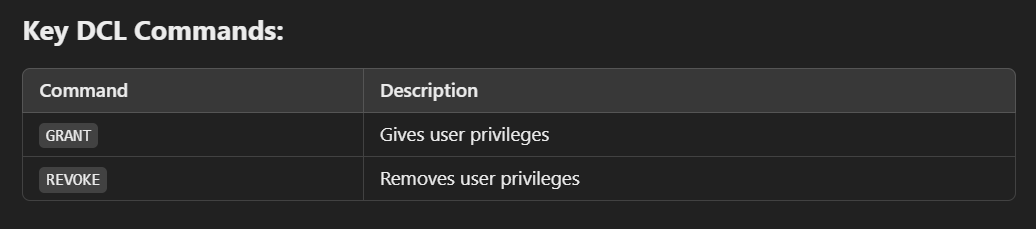

Key DCL Commands:

# ACID properties
ACID properties ensure that database transactions are processed reliably and maintain data integrity. The four 

ACID properties are:
- Atomicity 🧩
- Consistency ✅
- Isolation 🔒
- Durability 💾

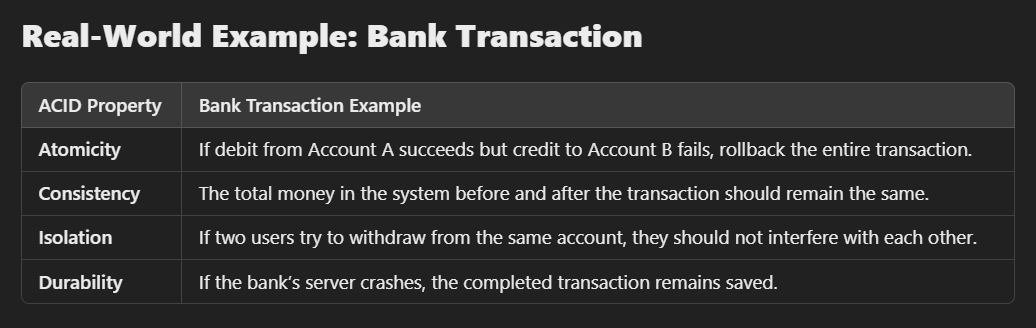

## Atomicity (All or Nothing) 🧩
A transaction must be fully completed or fully rolled back—no partial execution is allowed.

**Example:**

- Suppose you transfer ₹1000 from Account A to Account B.
- The transaction has two operations:
    1. Debit ₹1000 from Account A
    2. Credit ₹1000 to Account B

**Problem:**
If the system crashes after step 1 but before step 2, ₹1000 is lost!

**Atomicity Solution:**

- If both steps succeed, COMMIT the transaction ✅
- If any step fails, ROLLBACK (undo all changes) ❌

In [ ]:
BEGIN TRANSACTION;
UPDATE Accounts SET Balance = Balance - 1000 WHERE Account_ID = 1; -- Debit
UPDATE Accounts SET Balance = Balance + 1000 WHERE Account_ID = 2; -- Credit
COMMIT;  -- Ensure both succeed

# If step 2 fails, ROLLBACK ensures Account A's ₹1000 remains unchanged.

## Consistency (Valid Data Before & After) ✅
A transaction must keep the database in a consistent state before and after execution.

**Example:**

- A bank enforces a rule:
    - Total balance across all accounts must always be ₹10,00,000.
- If a transfer causes the total balance to become ₹9,99,000 or ₹10,01,000, the database is inconsistent ❌

In [ ]:
BEGIN TRANSACTION;
UPDATE Accounts SET Balance = Balance - 1000 WHERE Account_ID = 1;
UPDATE Accounts SET Balance = Balance + 1000 WHERE Account_ID = 2;

IF (SELECT SUM(Balance) FROM Accounts) != 1000000
    ROLLBACK; -- Prevent inconsistency
ELSE
    COMMIT;


# ✅ Ensures total balance remains ₹10,00,000, maintaining consistency.

## Isolation (Concurrent Transactions Won’t Interfere) 🔒
Multiple transactions can execute simultaneously but must not affect each other.

**Problem Without Isolation:**

- User A transfers ₹500 from Account X to Y.
- User B checks Account X balance at the same time.
- If User B sees an incorrect balance (due to an incomplete transaction), it leads to data inconsistency.

In [ ]:
SET TRANSACTION ISOLATION LEVEL SERIALIZABLE;

BEGIN TRANSACTION;
UPDATE Accounts SET Balance = Balance - 500 WHERE Account_ID = 1;
UPDATE Accounts SET Balance = Balance + 500 WHERE Account_ID = 2;
COMMIT;

# ✅ Ensures User B cannot read partial data from an ongoing transaction.

## Durability (Changes are Permanent) 💾
Once a transaction is committed, changes must be permanently stored in the database—even if the system crashes.

**Example:**

- You book a movie ticket online.
- After payment confirmation, the system crashes.
- If the booking is lost, it violates durability ❌
    
**Solution:**

- After COMMIT, changes must be written to disk/log files so they can be recovered after a crash.

In [ ]:
BEGIN TRANSACTION;
UPDATE Bookings SET Status = 'Confirmed' WHERE Ticket_ID = 101;
COMMIT;

# ✅ Ensures your movie ticket remains booked, even after a crash.

# Relationship
In SQL, we implement different types of relationships using primary keys (PK), foreign keys (FK), and junction tables. Below are examples of how to implement one-to-one, one-to-many, many-to-one, and many-to-many relationships in SQL.

## One-to-One (1:1) Relationship
- Each record in Table A has exactly one related record in Table B.
- Implemented using a Foreign Key in one table that also serves as a Primary Key.

In [ ]:
CREATE TABLE Users (
    user_id INT PRIMARY KEY,
    name VARCHAR(100)
);

CREATE TABLE Profiles (
    profile_id INT PRIMARY KEY,
    user_id INT UNIQUE,  -- Ensures one-to-one relationship
    bio TEXT,
    FOREIGN KEY (user_id) REFERENCES Users(user_id) ON DELETE CASCADE
);


## One-to-Many (1:M) Relationship
- One record in Table A can be associated with multiple records in Table B.
- Implemented by placing a Foreign Key in the child table (Table B) that references the Primary Key of the parent table (Table A).

In [ ]:
CREATE TABLE Customers (
    customer_id INT PRIMARY KEY,
    name VARCHAR(100)
);

CREATE TABLE Orders (
    order_id INT PRIMARY KEY,
    customer_id INT,  -- Foreign key establishes one-to-many relation
    order_date DATE,
    FOREIGN KEY (customer_id) REFERENCES Customers(customer_id) ON DELETE CASCADE
);

# A customer can have multiple orders, but each order belongs to only one customer.

## Many-to-One (M:1) Relationship
- It is simply the inverse of One-to-Many.
- Multiple records in Table A are related to a single record in Table B.

In [ ]:
CREATE TABLE Classes (
    class_id INT PRIMARY KEY,
    class_name VARCHAR(100)
);

CREATE TABLE Students (
    student_id INT PRIMARY KEY,
    name VARCHAR(100),
    class_id INT,
    FOREIGN KEY (class_id) REFERENCES Classes(class_id) ON DELETE SET NULL
);

# Multiple students belong to a single class.

## Many-to-Many (M:N) Relationship
- One record in Table A can be related to many records in Table B, and vice versa.
- Implemented using a junction (association) table that contains Foreign Keys referencing both tables.

In [ ]:
CREATE TABLE Students (
    student_id INT PRIMARY KEY,
    name VARCHAR(100)
);

CREATE TABLE Courses (
    course_id INT PRIMARY KEY,
    course_name VARCHAR(100)
);

-- Junction Table
CREATE TABLE Student_Courses (
    student_id INT,
    course_id INT,
    PRIMARY KEY (student_id, course_id),  -- Composite Primary Key
    FOREIGN KEY (student_id) REFERENCES Students(student_id) ON DELETE CASCADE,
    FOREIGN KEY (course_id) REFERENCES Courses(course_id) ON DELETE CASCADE
);

# A student can enroll in multiple courses.
# A course can have multiple students.

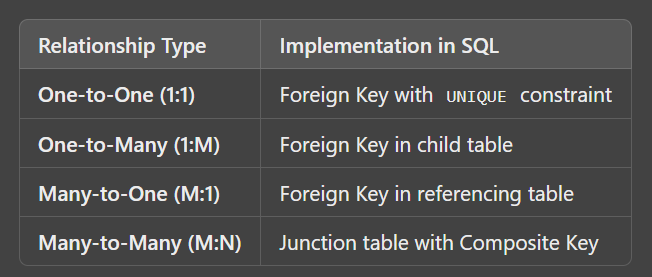